# The print of The King
### Visualizing the performance of LeBron "The King" James when he plays in other states.

### Context  
If somebody doesn't know who he is: LeBron James (nicknamed "The King") is one of NBA's top players of all times and anrguably the most dominant player of this century. Known for his freakish athleticism and skills, he has also been extremely consistent, dominating the game since he entered the league in 2003 and showing no signs of decline.  

### The goal  
The purpose of this visualization is to see which states suffered the most when James and his team came to play. LeBron has played for 3 different teams in his career: his hometown team Cleveland Cavaliers (2 separated periods), the Miami Heat and the L.A. Lakers (currently), so it is interesting to see if the punishment recieved for each state changed depending on the team he played for.

### First, get and prepare the data 

Data source for this project is [Basketball Reference](https://www.basketball-reference.com/) database, and in particular the data from [LeBron James' profile](https://www.basketball-reference.com/players/j/jamesle01.html).  

The idea is to scrap the data of each game, year by year, and combine it into a single full database.

In [1]:
# Load libraries
library(tidyverse)  # for data wrangling
library(rvest)      # for web scraping

Warning message:
"package 'tidyverse' was built under R version 3.5.3"
-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.2.1     v purrr   0.3.3
v tibble  3.0.1     v dplyr   0.8.5
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0

Warning message:
"package 'ggplot2' was built under R version 3.5.3"
Warning message:
"package 'tibble' was built under R version 3.5.3"
Warning message:
"package 'tidyr' was built under R version 3.5.3"
Warning message:
"package 'readr' was built under R version 3.5.3"
Warning message:
"package 'purrr' was built under R version 3.5.3"
Warning message:
"package 'dplyr' was built under R version 3.5.3"
Warning message:
"package 'stringr' was built under R version 3.5.3"
Warning message:
"package 'forcats' was built under R version 3.5.3"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
# Get the data for each year, from 2004 to 2020 (year corresponding to the ending of each season)

for(i in 2004:2020){
    #Iterate over each year's stat page
  url <- paste0("https://www.basketball-reference.com/players/j/jamesle01/gamelog/", i)
    
    #Scrap the stats table (8th in the html)
  season_stats <- url %>% read_html() %>% html_table(header = TRUE, fill = TRUE) %>% .[[8]]
  colnames(season_stats)[c(6,8)] <- c("Court", "Outcome") #Fill empty column names
  season_stats <- season_stats %>% filter(Rk != "Rk") %>% mutate(Season = i) #Remove repeated headers, add year column
    
    #The first year (2004) serves as a framework for the final DataFrame, next years add up to it
  if(i == 2004){ 
    full_stats <- season_stats
  } else {
    full_stats <- rbind(full_stats, season_stats)
  }
  
}
head(full_stats, 15)

Rk,G,Date,Age,Tm,Court,Opp,Outcome,GS,MP,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,Season
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,1,2003-10-29,18-303,CLE,@,SAC,L (-14),1,42:50,...,6,9,4,0,2,3,25,24.7,-9,2004
2,2,2003-10-30,18-304,CLE,@,PHO,L (-9),1,40:21,...,12,8,1,0,7,1,21,14.7,-3,2004
3,3,2003-11-01,18-306,CLE,@,POR,L (-19),1,39:10,...,4,6,2,0,2,3,8,5.0,-21,2004
4,4,2003-11-05,18-310,CLE,,DEN,L (-4),1,41:06,...,11,7,2,3,2,1,7,11.2,-3,2004
5,5,2003-11-07,18-312,CLE,@,IND,L (-1),1,43:44,...,5,3,0,0,7,2,23,9.0,-7,2004
6,6,2003-11-08,18-313,CLE,,WAS,W (+13),1,44:30,...,8,9,1,1,2,1,17,15.7,+14,2004
7,7,2003-11-10,18-315,CLE,,NYK,W (+14),1,33:39,...,5,4,1,1,2,0,17,15.8,+20,2004
8,8,2003-11-12,18-317,CLE,@,MIA,L (-5),1,42:40,...,3,7,2,1,4,3,18,12.8,-4,2004
9,9,2003-11-14,18-319,CLE,@,BOS,L (-9),1,35:36,...,5,3,0,0,4,3,10,0.8,-1,2004


Now, lets filter to retain only the **away games** ('@' in field Court) where he was **active** (not injured or resting, GS = 1)

In [3]:
visitor_stats <- full_stats %>%
  filter(Court == "@") %>%
  filter(GS == "1") %>%
  mutate(PTS = as.numeric(PTS)) #Stats are coded as characters. Change at least the format for points.

Let's group and summarise to see the "damage" done to each team.

In [4]:
damage_by_team <- visitor_stats %>% group_by(Opp) %>% summarise("PPG" = mean(PTS))
damage_by_team

Opp,PPG
<chr>,<dbl>
ATL,28.33333
BOS,27.52174
BRK,28.33333
CHA,27.93750
CHI,29.93333
CHO,29.71429
CLE,31.57143
DAL,29.17647
DEN,26.88235


Now we need to have location data for each team.  
I could not find a complete set of data covering all the teams (some have dissapeared or changed cities over time), so I built the table by hand. Not very fancy, but it's the best fit to get the desired format.

In [5]:
team_locations <- data.frame("Opp" = damage_by_team$Opp,
                             "Team" = c("Atlanta Hawks", "Boston Celtics", "Brooklyn Nets", "Charlotte Hornets", "Chicago Bulls", "Charlotte Hornets", "Cleveland Cavaliers", "Dallas Mavericks", "Denver Nuggets", "Detroit Pistons", "Golden State Warriors", "Houston Rockets", "Indiana Pacers", "Los Angeles Clippers", "Los Angeles Lakers", "Memphis Grizzlies", "Miami Heat", "Milwaukee Bucks", "Minnesota Timperwolves", "New Jersey Nets", "New Orleans Hornets", "New Orleans Hornets in Oklahoma", "New Orleans Pelicans", "New York Knicks", "Oklahoma City Thunder", "Orlando Magic", "Philadelphia 76ers", "Phoenix Suns", "Portland Trail Blazers", "Sacramento Kings", "San Antonio Spurs", "Seattle Supersonics", "Toronto Raptors", "Utah Jazz", "Washington Wizards"),
                             "City" = c("Atlanta", "Boston", "Brooklin", "Charlotte", "Chicago", "Charlotte", "Cleveland", "Dallas", "Denver", "Detroit", "Oakland", "Houston", "Indianapolis", "Los Angeles", "Los Angeles", "Memphis", "Miami", "Milwaukee", "Minneapolis", "New Jersey", "New Orleans", "Oklahoma City", "New Orleans", "New York", "Oklahoma City", "Orlando", "Philadelphia", "Phoenix", "Portland", "Sacramento", "San Antonio", "Seattle", "Toronto","Salt Lake City", "Washington D.C."),
                             "State" = c("Georgia", "Massachusetts", "New York", "North Carolina", "Illinois", "North Carolina", "Ohio", "Texas", "Colorado", "Michigan", "California", "Texas", "Indiana", "California", "California", "Tennessee", "Florida", "Wisconsin", "Minnesota", "New Jersey", "Louisiana", "Oklahoma", "Louisiana", "New York", "Oklahoma", "Florida", "Pennsylvania", "Arizona", "Oregon", "California", "Texas", "Washington", "Ontario", "Utah", "District of columbia"))

#Change from factor to character
team_locations <- team_locations %>% mutate(Opp = as.character(Opp),
                                            Team = as.character(Team),
                                            City = as.character(City),
                                            State = str_to_lower(as.character(State))) #Lower case will be needed later

team_locations

Opp,Team,City,State
<chr>,<chr>,<chr>,<chr>
ATL,Atlanta Hawks,Atlanta,georgia
BOS,Boston Celtics,Boston,massachusetts
BRK,Brooklyn Nets,Brooklin,new york
CHA,Charlotte Hornets,Charlotte,north carolina
CHI,Chicago Bulls,Chicago,illinois
CHO,Charlotte Hornets,Charlotte,north carolina
CLE,Cleveland Cavaliers,Cleveland,ohio
DAL,Dallas Mavericks,Dallas,texas
DEN,Denver Nuggets,Denver,colorado


Now, I incorporate the "team location" data into de stats data (as visitor)

In [6]:
visitor_stats <- left_join(visitor_stats, team_locations, by="Opp")

visitor_stats[sample(1:nrow(visitor_stats), 10), ] #show 10 random rows

,Rk,G,Date,Age,Tm,Court,Opp,Outcome,GS,MP,...,BLK,TOV,PF,PTS,GmSc,+/-,Season,Team,City,State
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
485,72,69,2016-03-24,31-085,CLE,@,BRK,L (-9),1,35:04,...,0,4,2,30,25.5,-8,2016,Brooklyn Nets,Brooklin,new york
177,39,34,2008-01-17,23-018,CLE,@,SAS,W (+2),1,38:54,...,2,3,1,27,19.0,-11,2008,San Antonio Spurs,San Antonio,texas
602,18,18,2019-11-27,34-332,LAL,@,NOP,W (+4),1,37:35,...,1,5,2,29,25.7,+3,2020,New Orleans Pelicans,New Orleans,louisiana
29,58,55,2004-02-25,19-057,CLE,@,HOU,L (-6),1,38:38,...,1,2,1,11,6.3,-5,2004,Houston Rockets,Houston,texas
73,67,65,2005-03-26,20-086,CLE,@,DAL,L (-31),1,35:39,...,0,3,1,19,11.9,-24,2005,Dallas Mavericks,Dallas,texas
334,42,41,2012-03-14,27-075,MIA,@,CHI,L (-4),1,39:38,...,0,2,2,35,29.0,+5,2012,Chicago Bulls,Chicago,illinois
480,64,62,2016-03-10,31-071,CLE,@,LAL,W (+12),1,34:50,...,2,3,2,24,18.6,+6,2016,Los Angeles Lakers,Los Angeles,california
315,3,3,2011-12-28,26-363,MIA,@,CHA,W (+1),1,38:49,...,2,2,0,35,33.2,+5,2012,Charlotte Hornets,Charlotte,north carolina
596,6,6,2019-11-03,34-308,LAL,@,SAS,W (+7),1,37:18,...,1,5,2,21,15.8,+15,2020,San Antonio Spurs,San Antonio,texas


### Let's see the damage done

I estimated the average points per game (PPG), and also standarization of values (mean in 0, range from -1 to 1) with the formula   $\frac{X - average}{st.dev}$

In [7]:
damage_by_state <- visitor_stats %>% group_by(State) %>%
                                        summarise("PPG" = mean(PTS),
                                                  "PPG_normalized" = (mean(PTS)-mean(visitor_stats$PTS))/(sd(visitor_stats$PTS)),
                                                  "N_games" = n())

damage_by_state

State,PPG,PPG_normalized,N_games
<chr>,<dbl>,<dbl>,<int>
arizona,27.52941,-0.01561802,17
california,26.47619,-0.14504875,63
colorado,26.88235,-0.09513530,17
district of columbia,28.04167,0.04733317,24
florida,28.18367,0.06478444,49
georgia,28.33333,0.08317619,27
illinois,29.93333,0.27980076,30
indiana,26.78571,-0.10701126,28
louisiana,27.81250,0.01917080,16


Some of the victims start to show up, as well as least favourite destinations. Let's visualize.

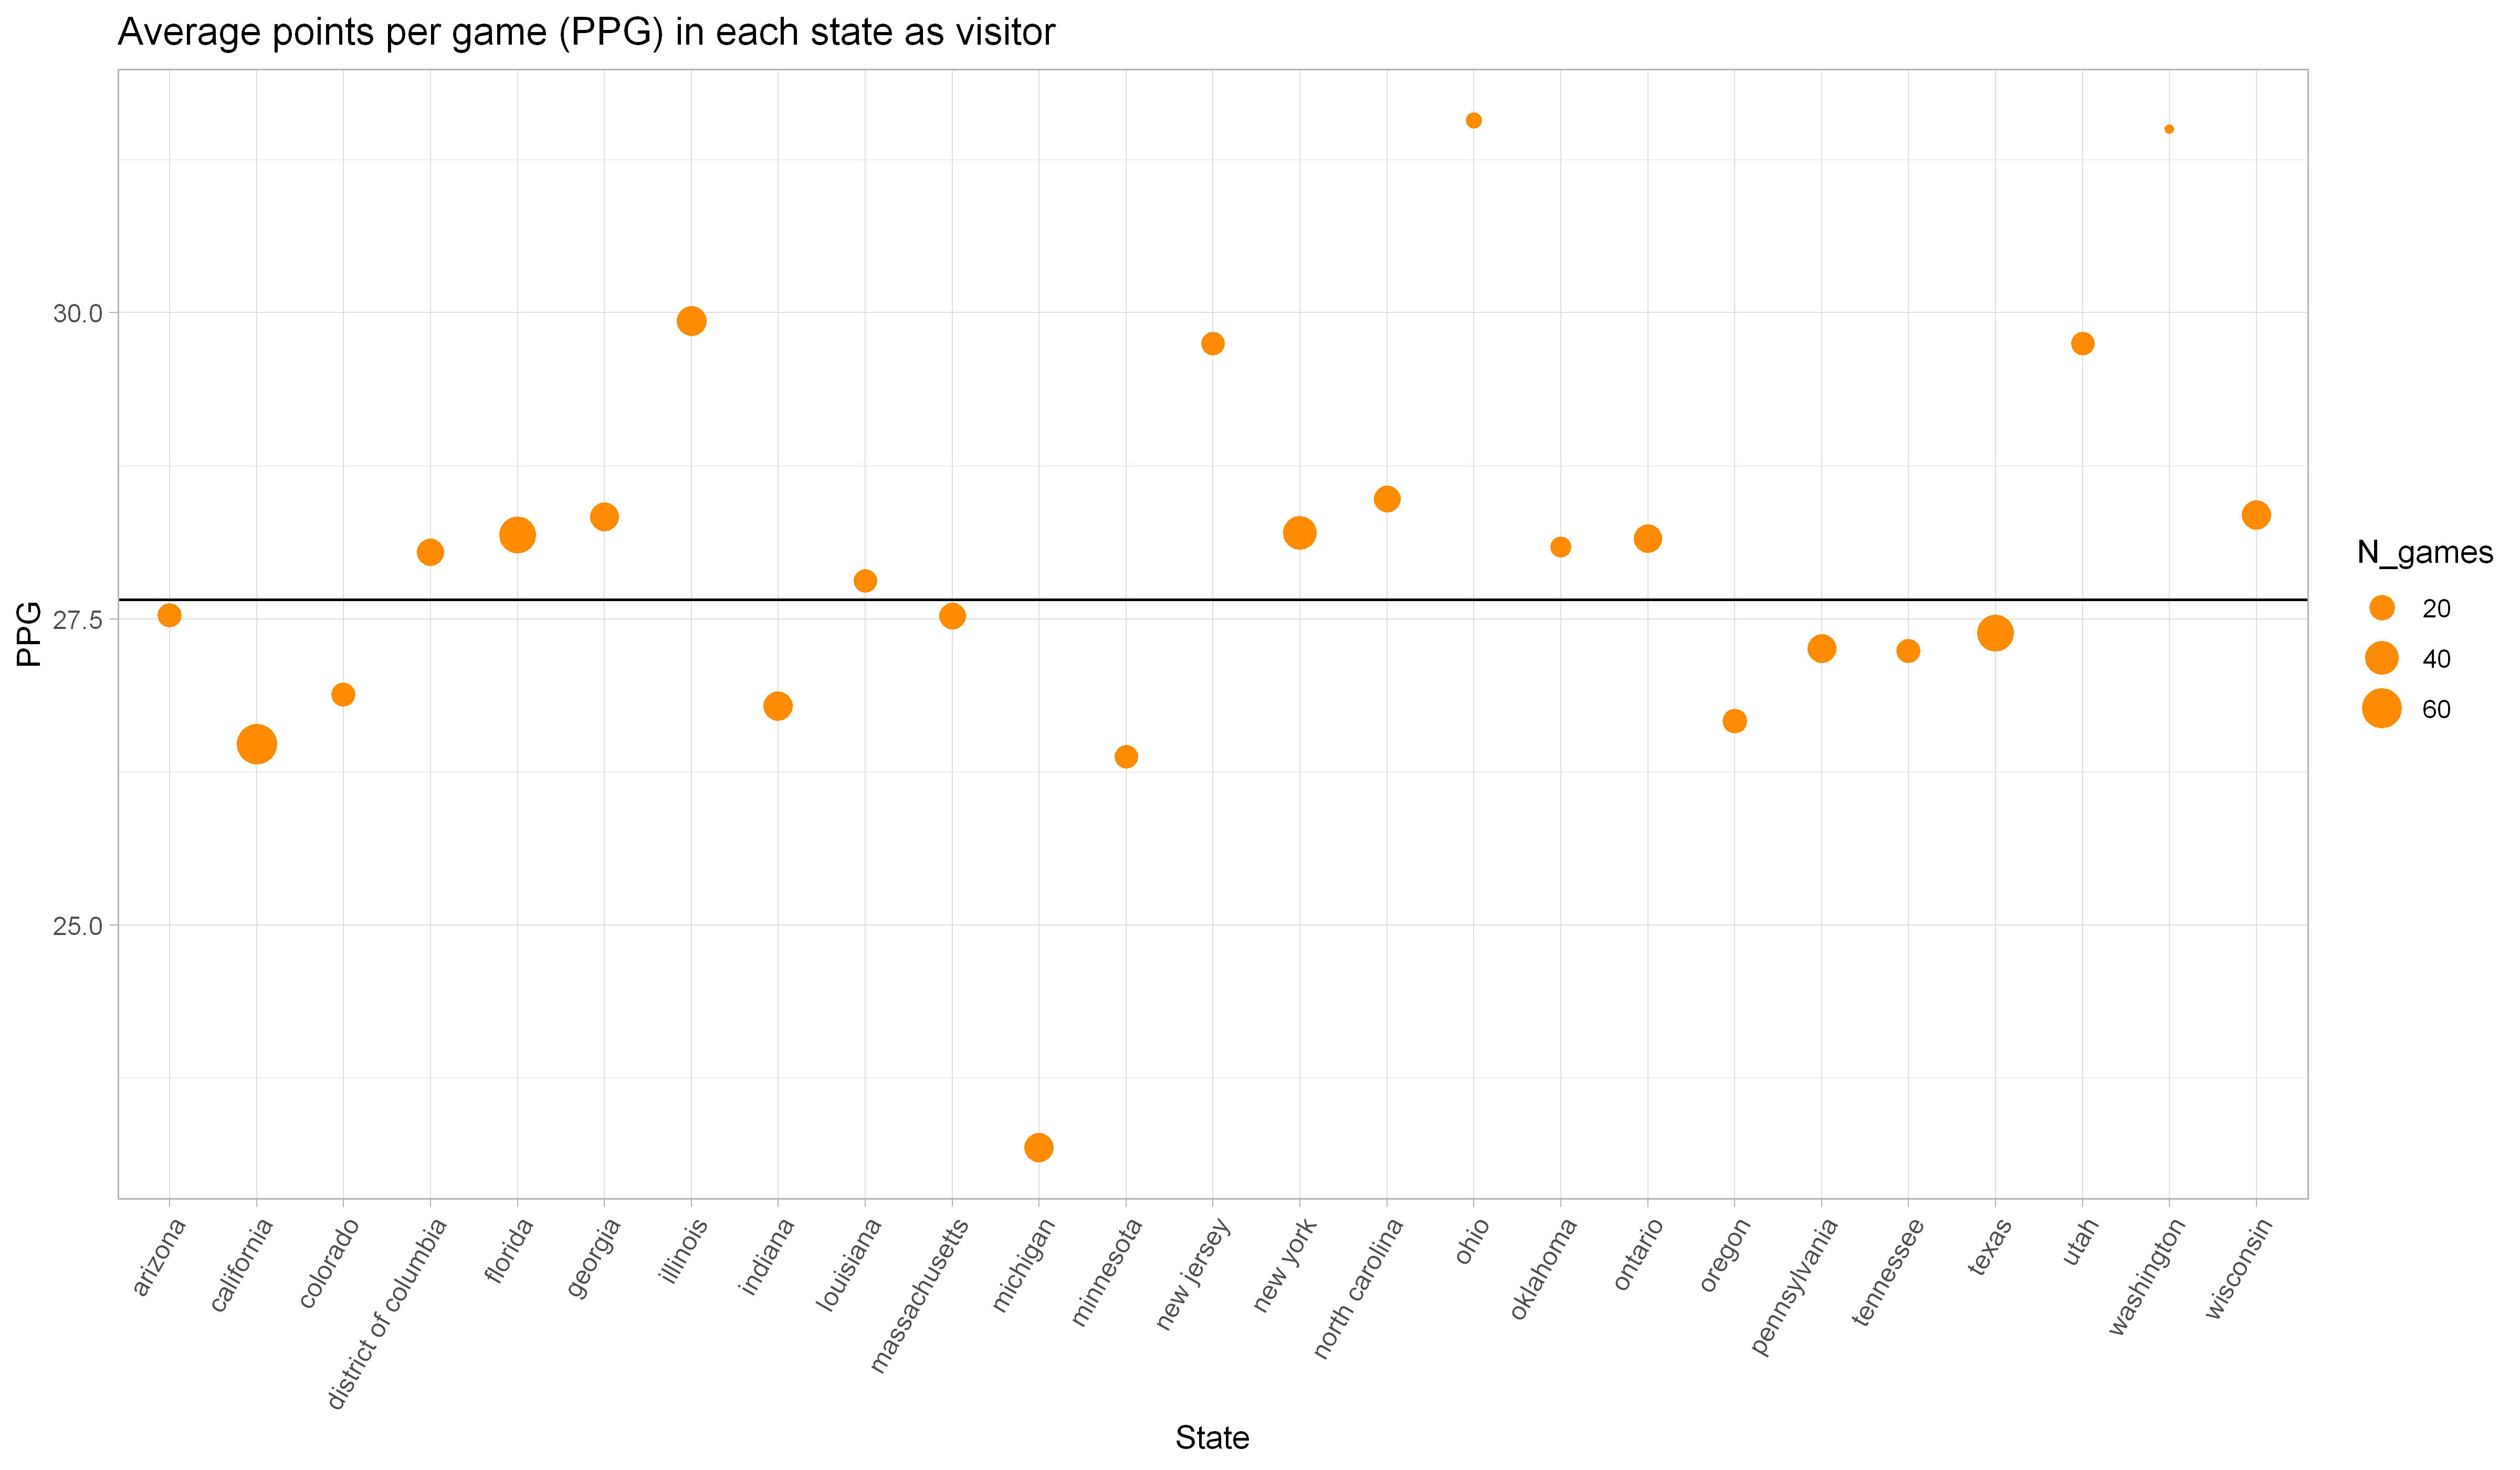

In [8]:
options(repr.plot.width = 12, repr.plot.height = 7, repr.plot.res = 400) #Change visualization specs
damage_by_state %>% 
  ggplot(aes(x=State, y=PPG))+
  geom_point(aes(size=N_games), color="darkorange")+
  geom_hline(yintercept=mean(visitor_stats$PTS))+
  labs(title="Average points per game (PPG) in each state as visitor")+
  theme_light()+
  theme(axis.text.x = element_text(size = 9, angle = 60, hjust = 1))

### Put it on a map

I will use the data from the `map_data` function from `ggplot2`

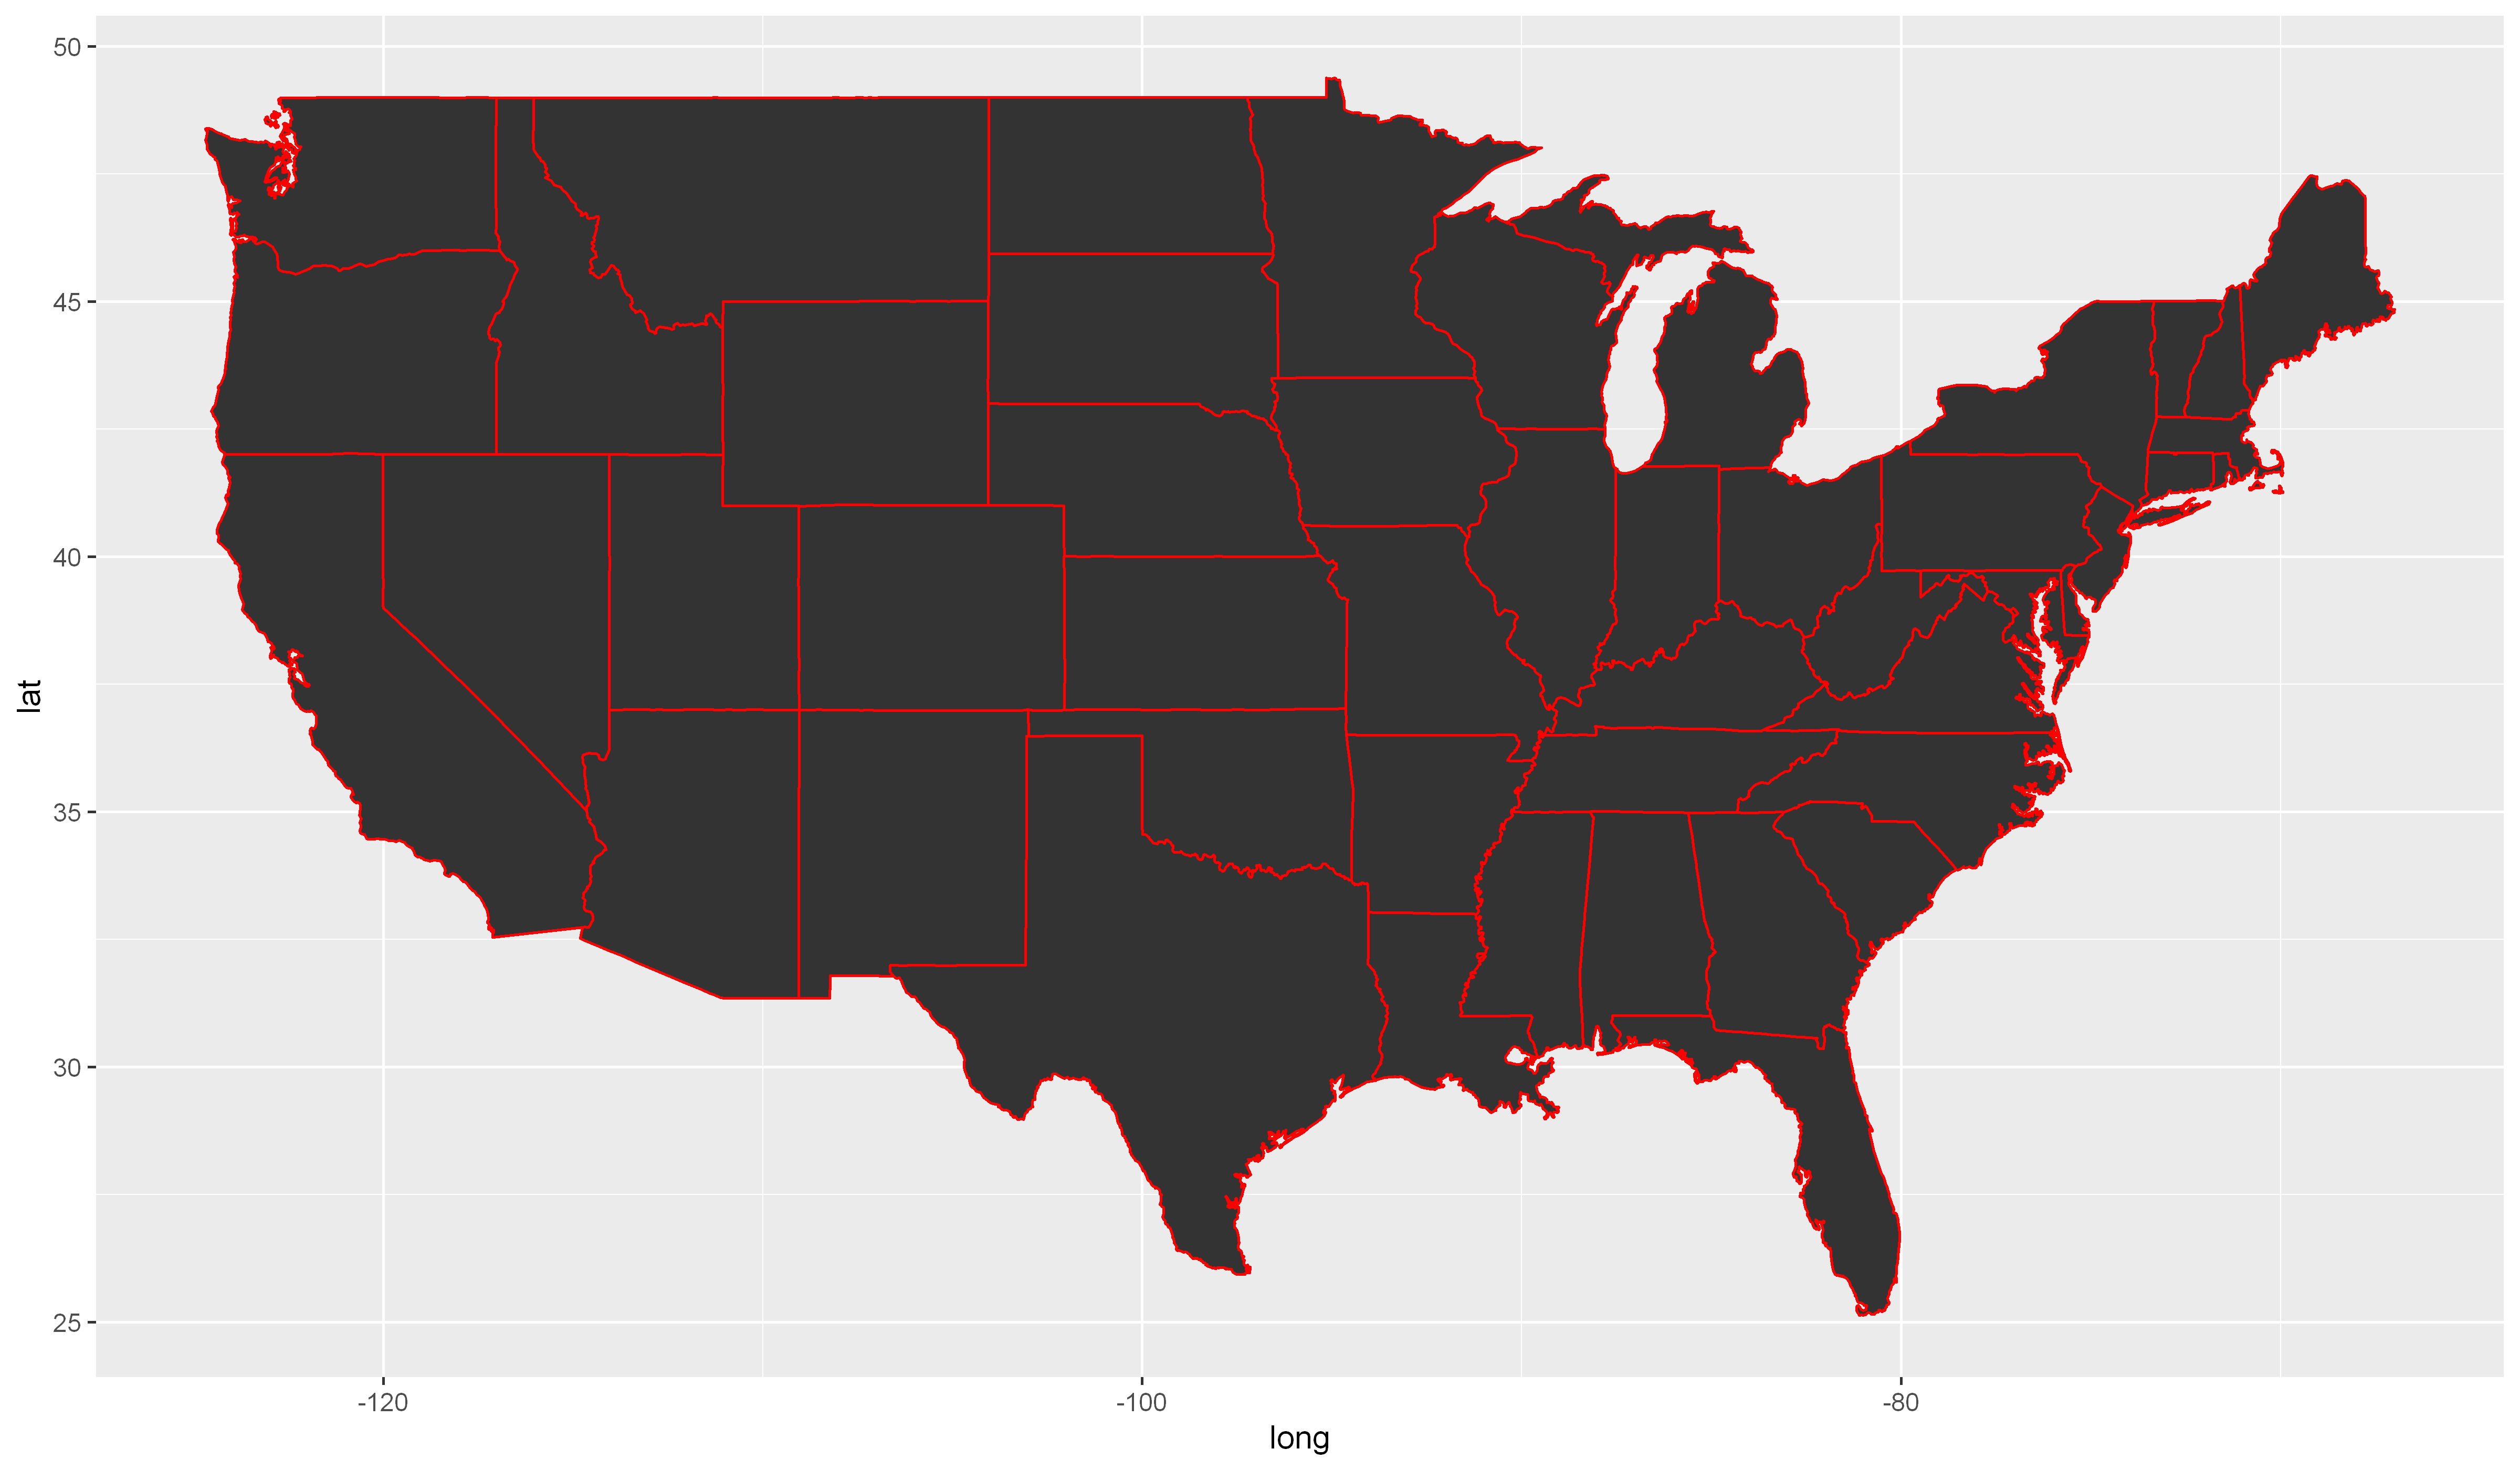

In [9]:

map_data("state") %>% 
  ggplot(aes(long, lat, group=group))+
  geom_polygon(color="red", size=0.5)

I save it as a DataFrame, with a field named "state", to join it with the stats per state  
Note: state names from `map_data` are all lowercase, which is why I put them as lowercase in the *team_locations* dataframe.

In [10]:
US_states <- map_data("state")
unique(US_states$region)
US_states <- US_states %>% mutate(State = region)

[1] "alabama"              "arizona"              "arkansas"            
 [4] "california"           "colorado"             "connecticut"         
 [7] "delaware"             "district of columbia" "florida"             
[10] "georgia"              "idaho"                "illinois"            
[13] "indiana"              "iowa"                 "kansas"              
[16] "kentucky"             "louisiana"            "maine"               
[19] "maryland"             "massachusetts"        "michigan"            
[22] "minnesota"            "mississippi"          "missouri"            
[25] "montana"              "nebraska"             "nevada"              
[28] "new hampshire"        "new jersey"           "new mexico"          
[31] "new york"             "north carolina"       "north dakota"        
[34] "ohio"                 "oklahoma"             "oregon"              
[37] "pennsylvania"         "rhode island"         "south carolina"      
[40] "south dakota"         "tennessee"            "texas"               
[43] "utah"                 "vermont"              "virginia"            
[46] "washington"           "west virginia"        "wisconsin"           
[49] "wyoming"

**Sorry Canada** but there isn't a map of provices/states in Canada included, so to simplify the process I will leave Ontario out.

In [11]:
#New DataFrame with polygons and stats.
map_data <- left_join(US_states, damage_by_state)

Joining, by = "State"



And now, time to plot it

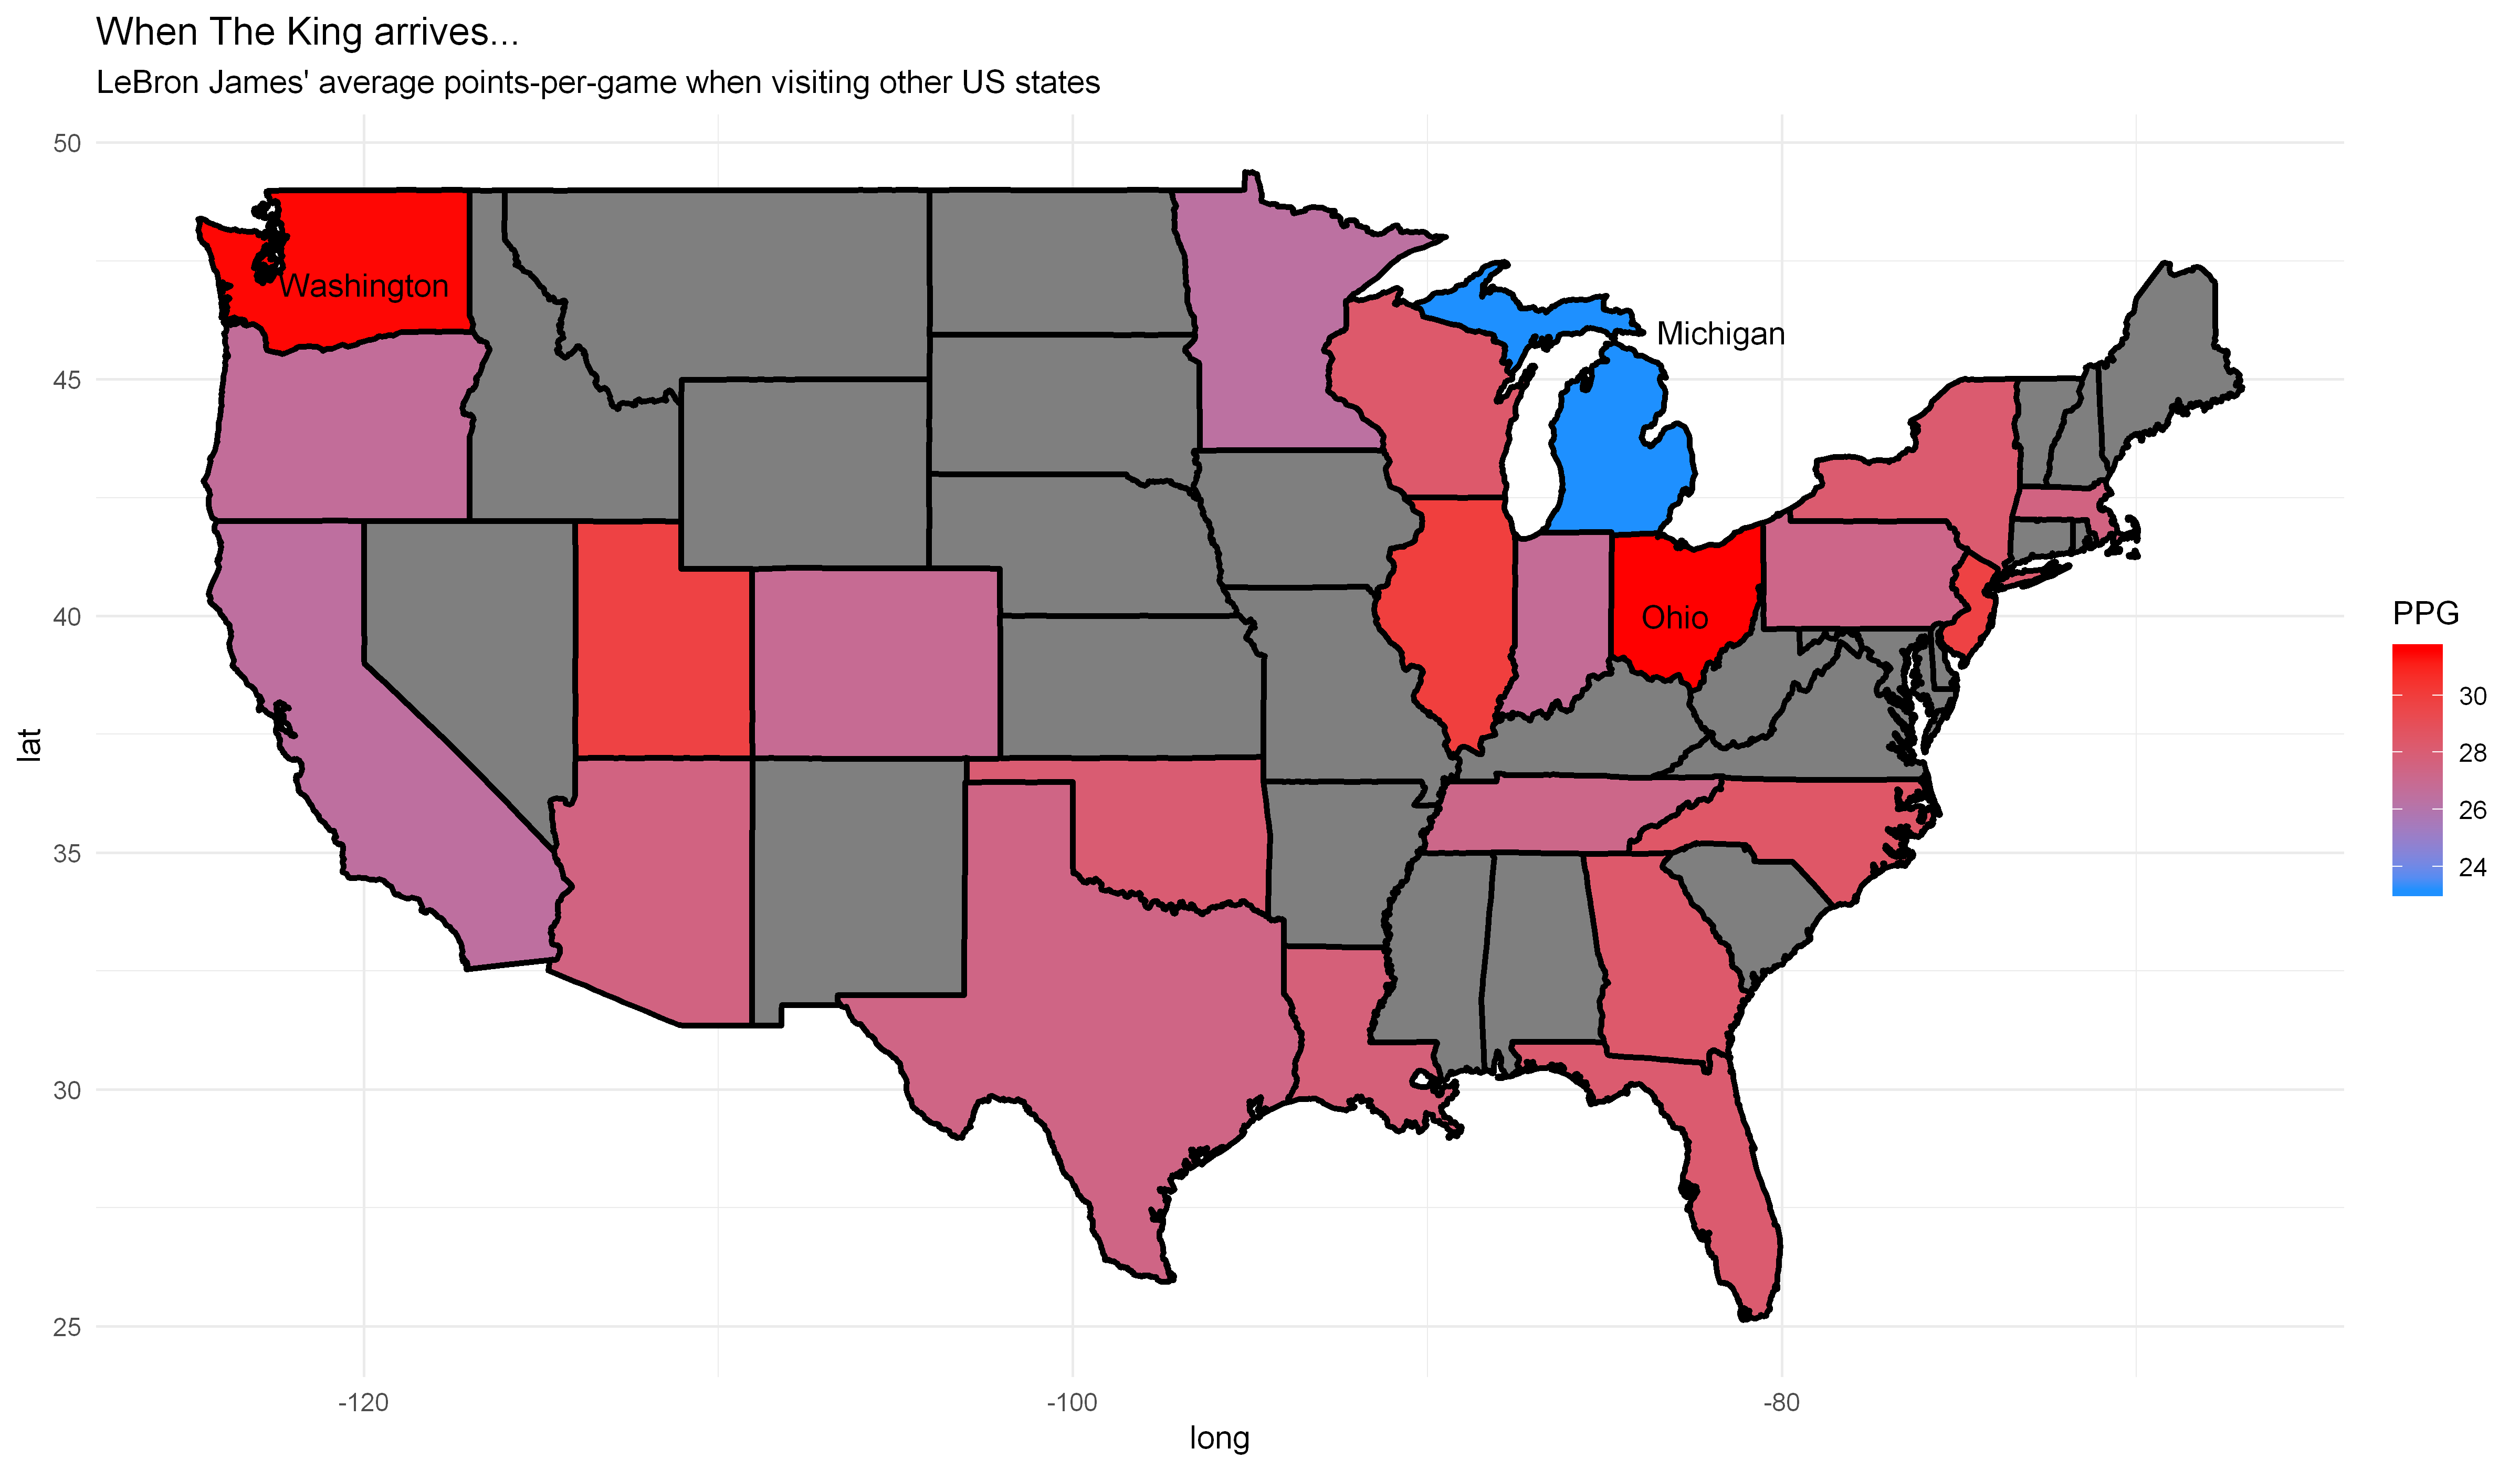

In [12]:
ggplot(map_data, aes(x=long, y=lat, group=group))+
  geom_polygon(aes(fill=PPG), color="black", size=1)+
  labs(title="When The King arrives...", subtitle = "LeBron James' average points-per-game when visiting other US states")+
  scale_fill_gradient(low="dodgerblue", high = "red")+
  annotate(geom="text", x=-81.7, y=46, label="Michigan")+
  annotate(geom="text", x=-83, y=40, label="Ohio")+
  annotate(geom="text", x=-120, y=47, label="Washington")+
  theme_minimal()

It looks like LeBron's favourite victims have been **Ohio** and **Washington**. Both are the states where he has the least amount of games as visitor.
- Ohio is his hometown, and also the state where he has played for most of his career (Cleveland Cavaliers). Returning home sounds like extra motivation. However this homecoming only happened 7 times.
- Washington was the home of the now dissapeared Seattle Supersonics, and he only went to play there 4 times (his first 4 seasons)

Interestingly, LeBron seems to be colder than usual when visiting **Michigan**. This state is the home of the Detroit Pistons, a team with a tradition of hard, physical, defensive basketball... although this is not the 90's anymore, so the difference in scoring there is surprising.


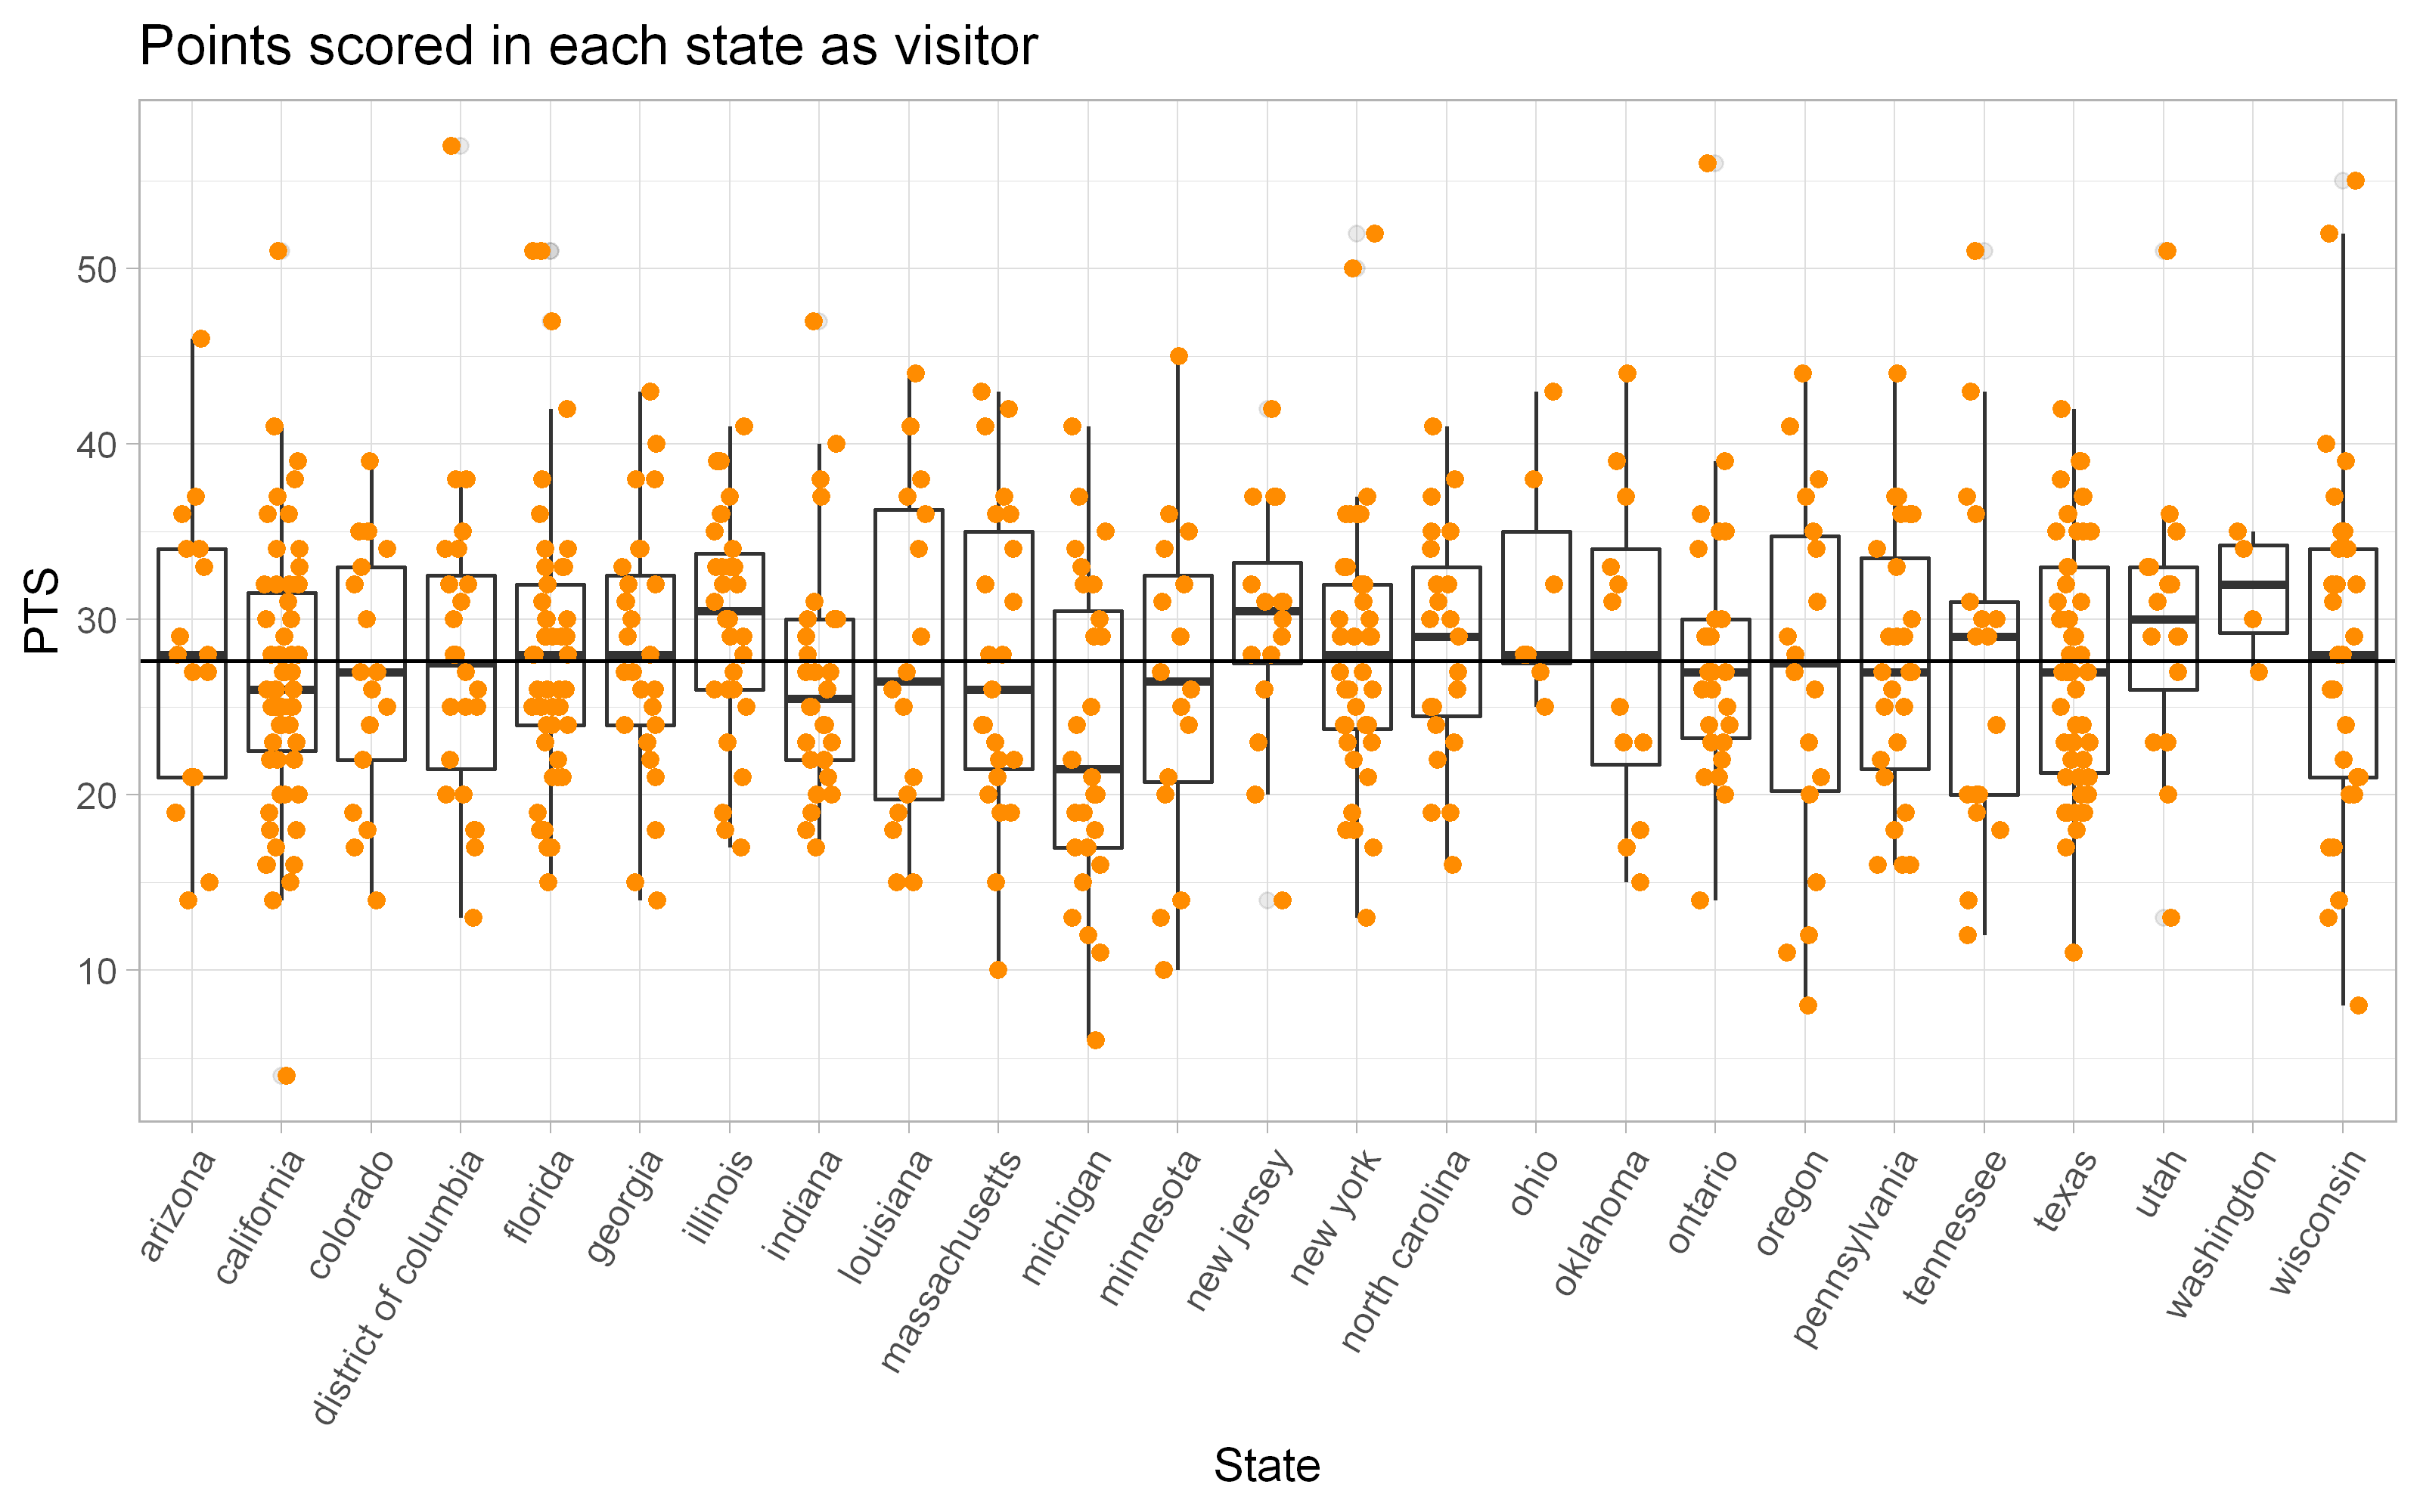

In [13]:
# Boxplots / points to visualize de distribution of the scoring in each game for every state

options(repr.plot.width = 8, repr.plot.height = 5, repr.plot.res = 400) #Change visualization specs
visitor_stats %>%
ggplot(aes(x=State, y=PTS))+
    geom_boxplot(fill="white", alpha=0.1)+
    geom_jitter(position=position_jitter(width=0.2, height=0), color="darkorange")+
    geom_hline(yintercept=mean(visitor_stats$PTS))+
    labs(title="Points scored in each state as visitor")+
    theme_light()+
    theme(axis.text.x = element_text(size = 9, angle = 60, hjust = 1))


Distribution of the scoring is pretty consistent around the mean across most states (Michigan still stands out as the least favourite destination).  
But now the question is: **is it also the same regardless of the team he played for?**

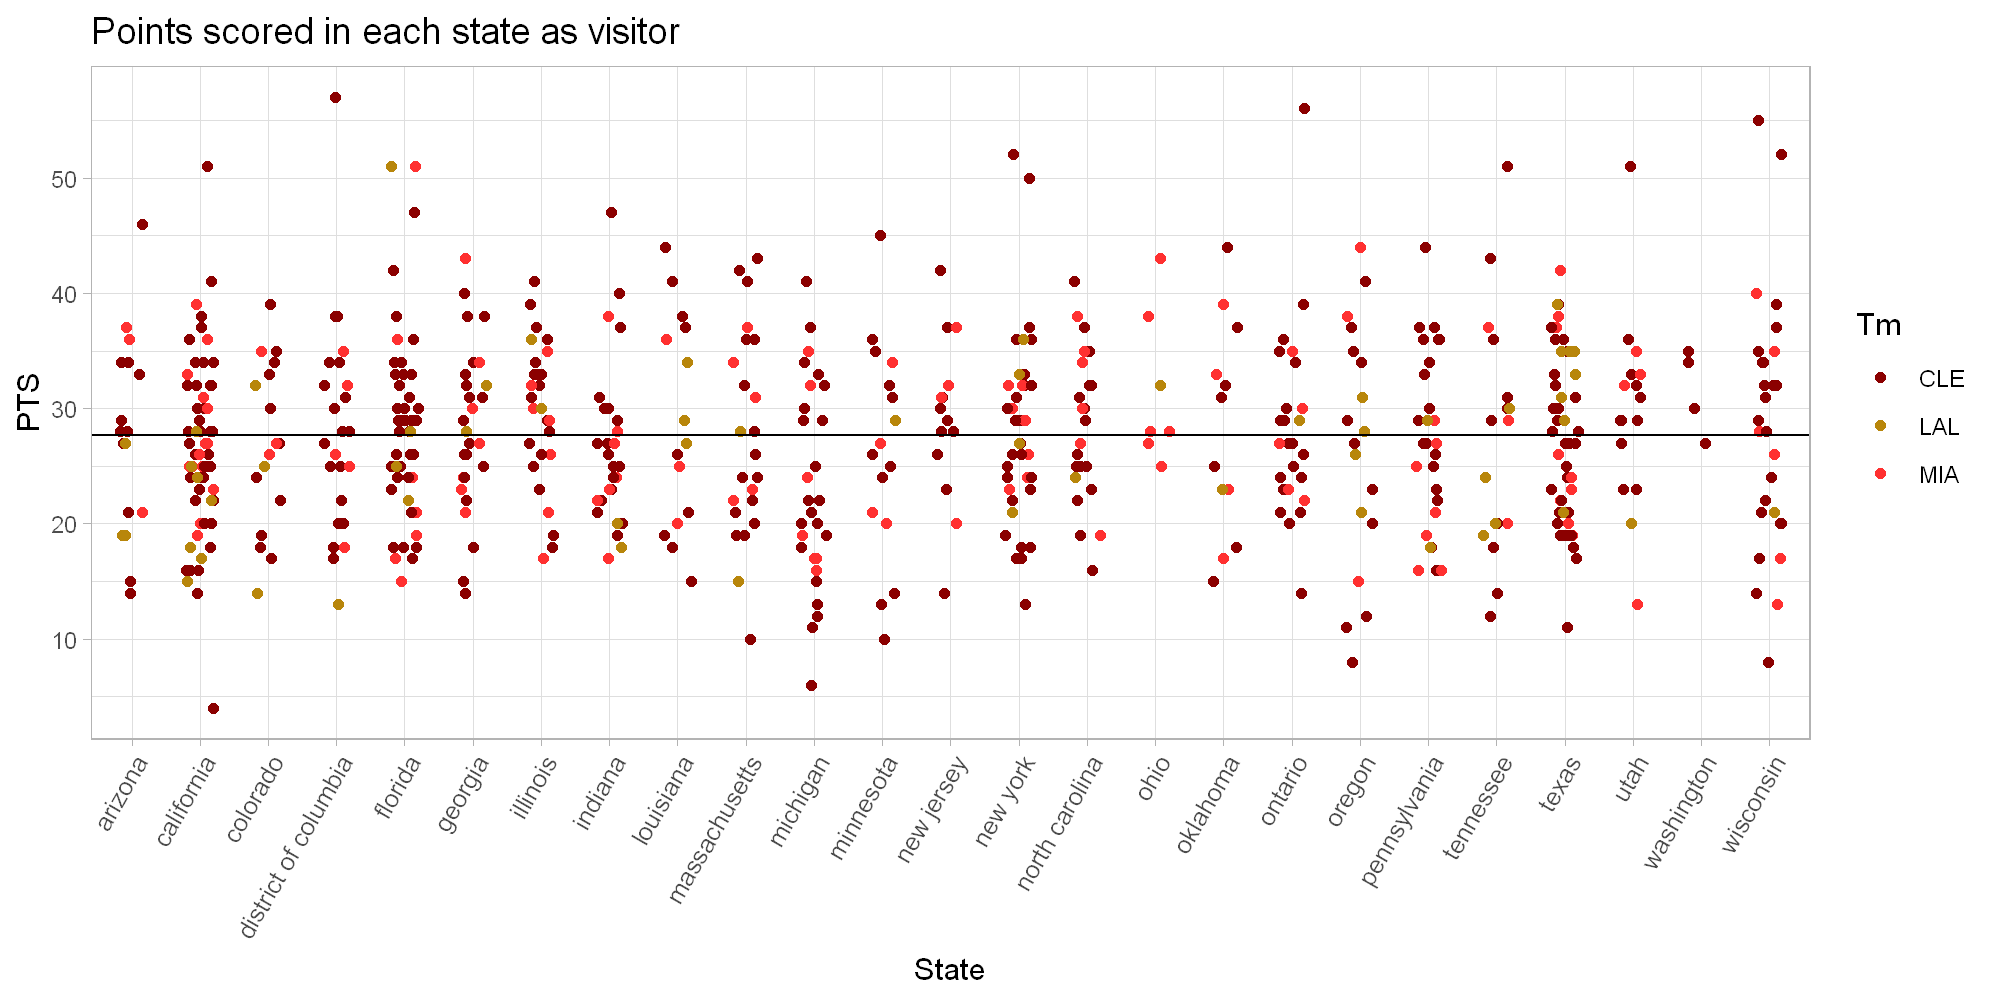

In [14]:
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 200) #Change visualization specs
visitor_stats %>%
ggplot(aes(x=State, y=PTS))+
    geom_jitter(aes(color=Tm),position=position_jitter(width=0.2, height=0))+
    scale_color_manual(values=c("CLE" = "darkred", "MIA"="firebrick1", "LAL"="darkgoldenrod"))+
    geom_hline(yintercept=mean(visitor_stats$PTS))+
    labs(title="Points scored in each state as visitor")+
    theme_light()+
    theme(axis.text.x = element_text(size = 9, angle = 60, hjust = 1))

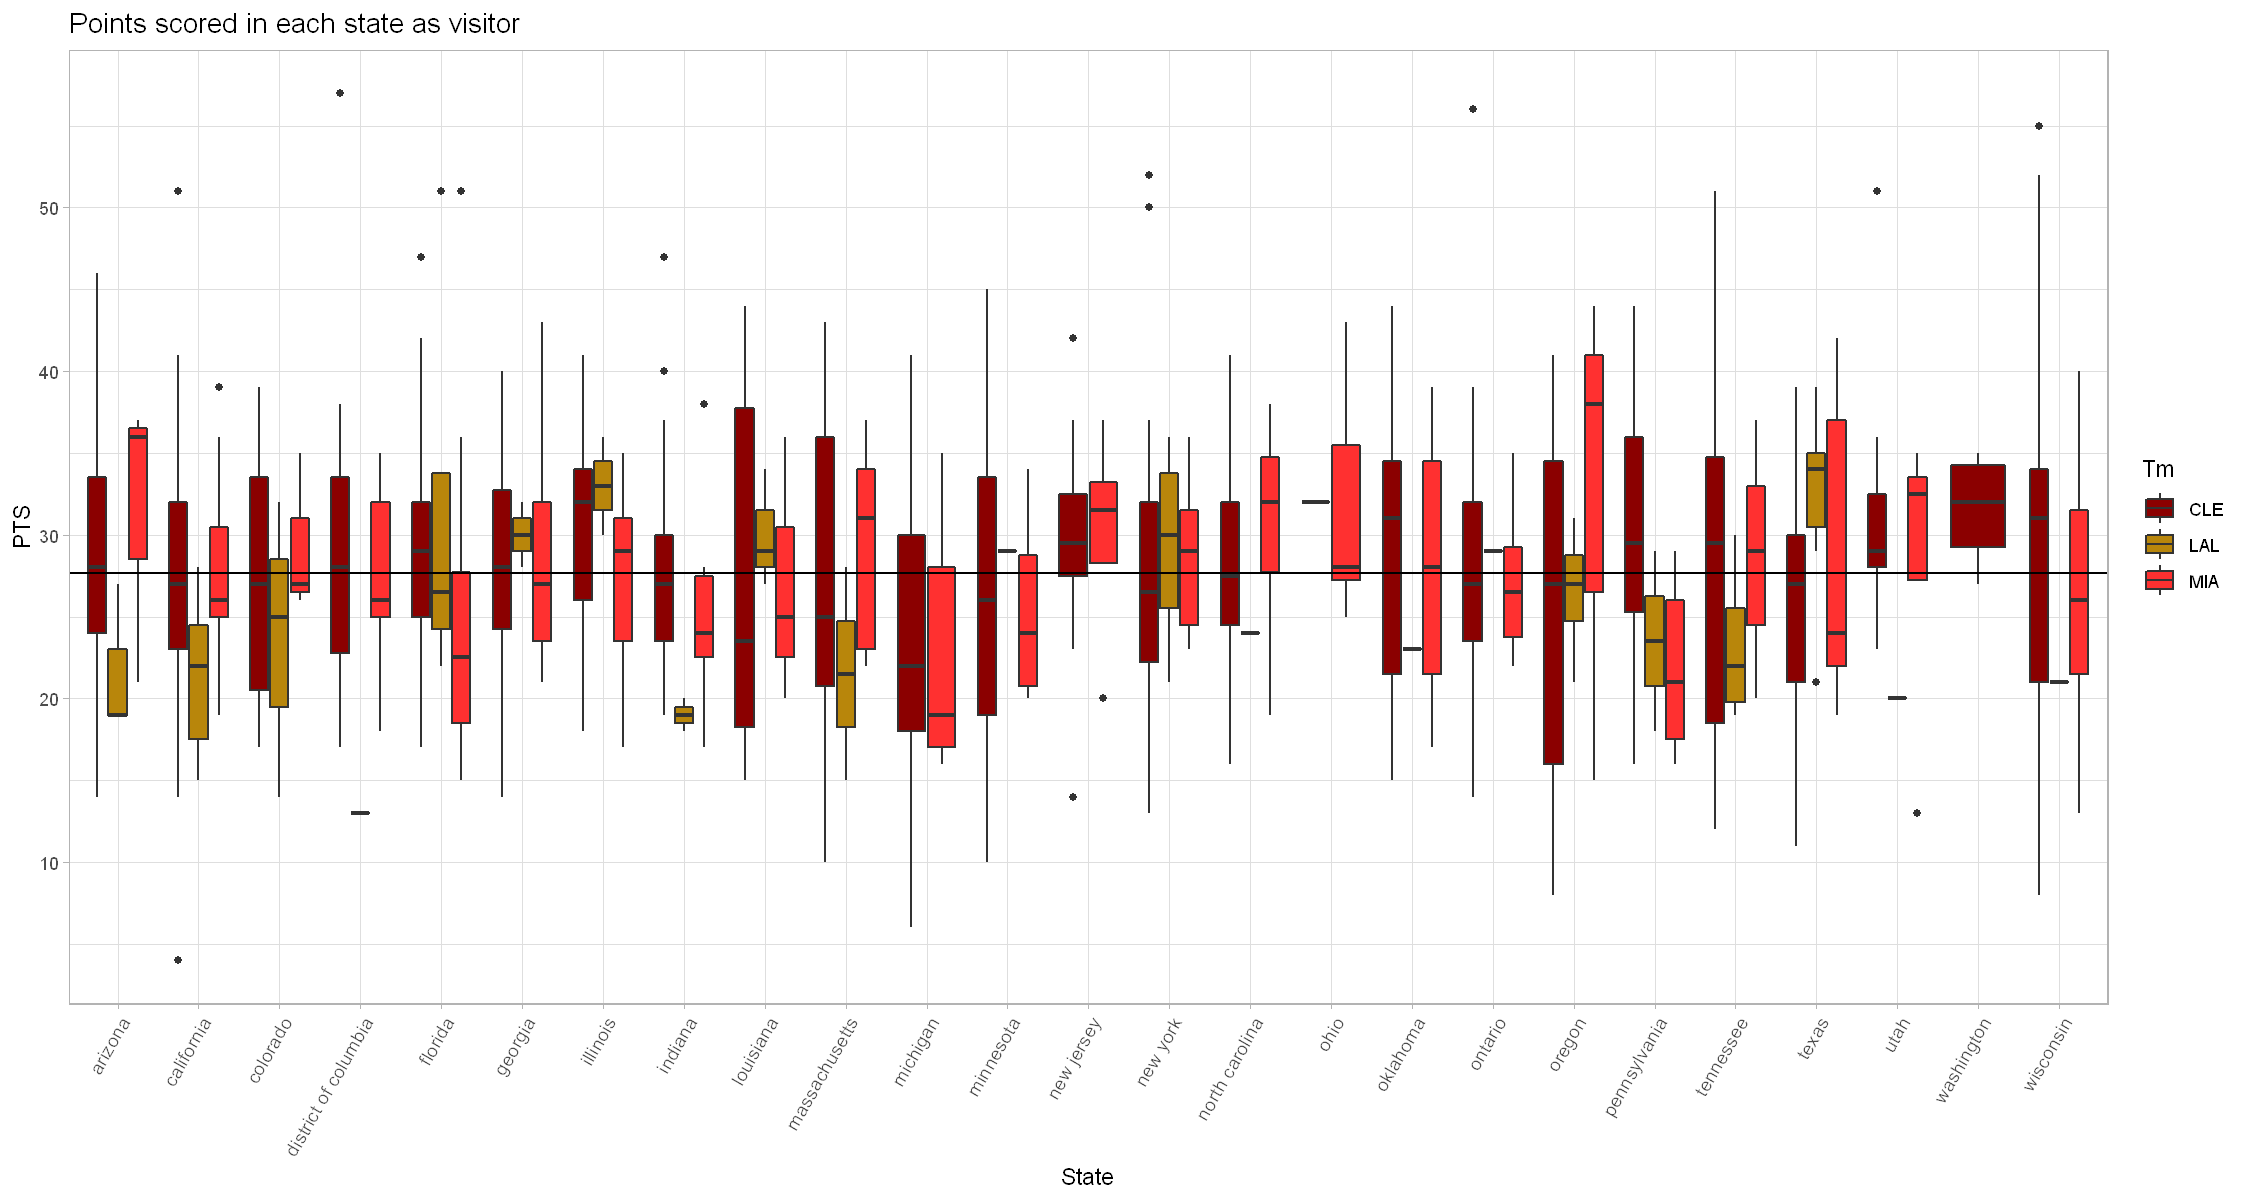

In [15]:
options(repr.plot.width = 15, repr.plot.height = 8, repr.plot.res = 150) #Change visualization specs
visitor_stats %>%
ggplot(aes(x=State, y=PTS, fill=Tm))+
    geom_boxplot()+
    scale_fill_manual(values=c("CLE" = "darkred", "MIA"="firebrick1", "LAL"="darkgoldenrod"))+
    geom_hline(yintercept=mean(visitor_stats$PTS))+
    labs(title="Points scored in each state as visitor")+
    theme_light()+
    theme(axis.text.x = element_text(size = 9, angle = 60, hjust = 1))

Not much can be said with this visualization. With only 1.5 seasons played in LAL, the best comparison is between CLE and MIA, where distributions are similar in most states.  
It seem that, as a member of the Miami Heat, he didn't have his best nights when playing against his neighbors in Florida (Orlando Magic). He also scored worse than usual when visiting the Philadelphia 76ers in Pensilvania.  
On the other hand, during that period, he seemed to enjoy playing in Arizona (Phoenix Suns) and Oregon (Portland Trail Blazers).  
In his nightmare territory of Michigan, he hasn't played yet as a Laker.

### Diferences between periods?

To look into the differences between periods of playing for different teams, first some context:

- Cleveland Cavaliers (2003-2010): went from being a losing team to one of the top teams in the league.  
- Miami Heat (2010-2014): joned 2 other superstars (Wade and Bosh), reached the finals every year, won 2 titles.
- Clevaland Cavaliers part 2 (2014-2018): returned home to a team that was OK-not-great but led it to the finals 4 years and won a title
- L.A. Lakers (2018- ): leading a team that is rebuilding and improving the roaster, success is yet to come.

Joining, by = "State"



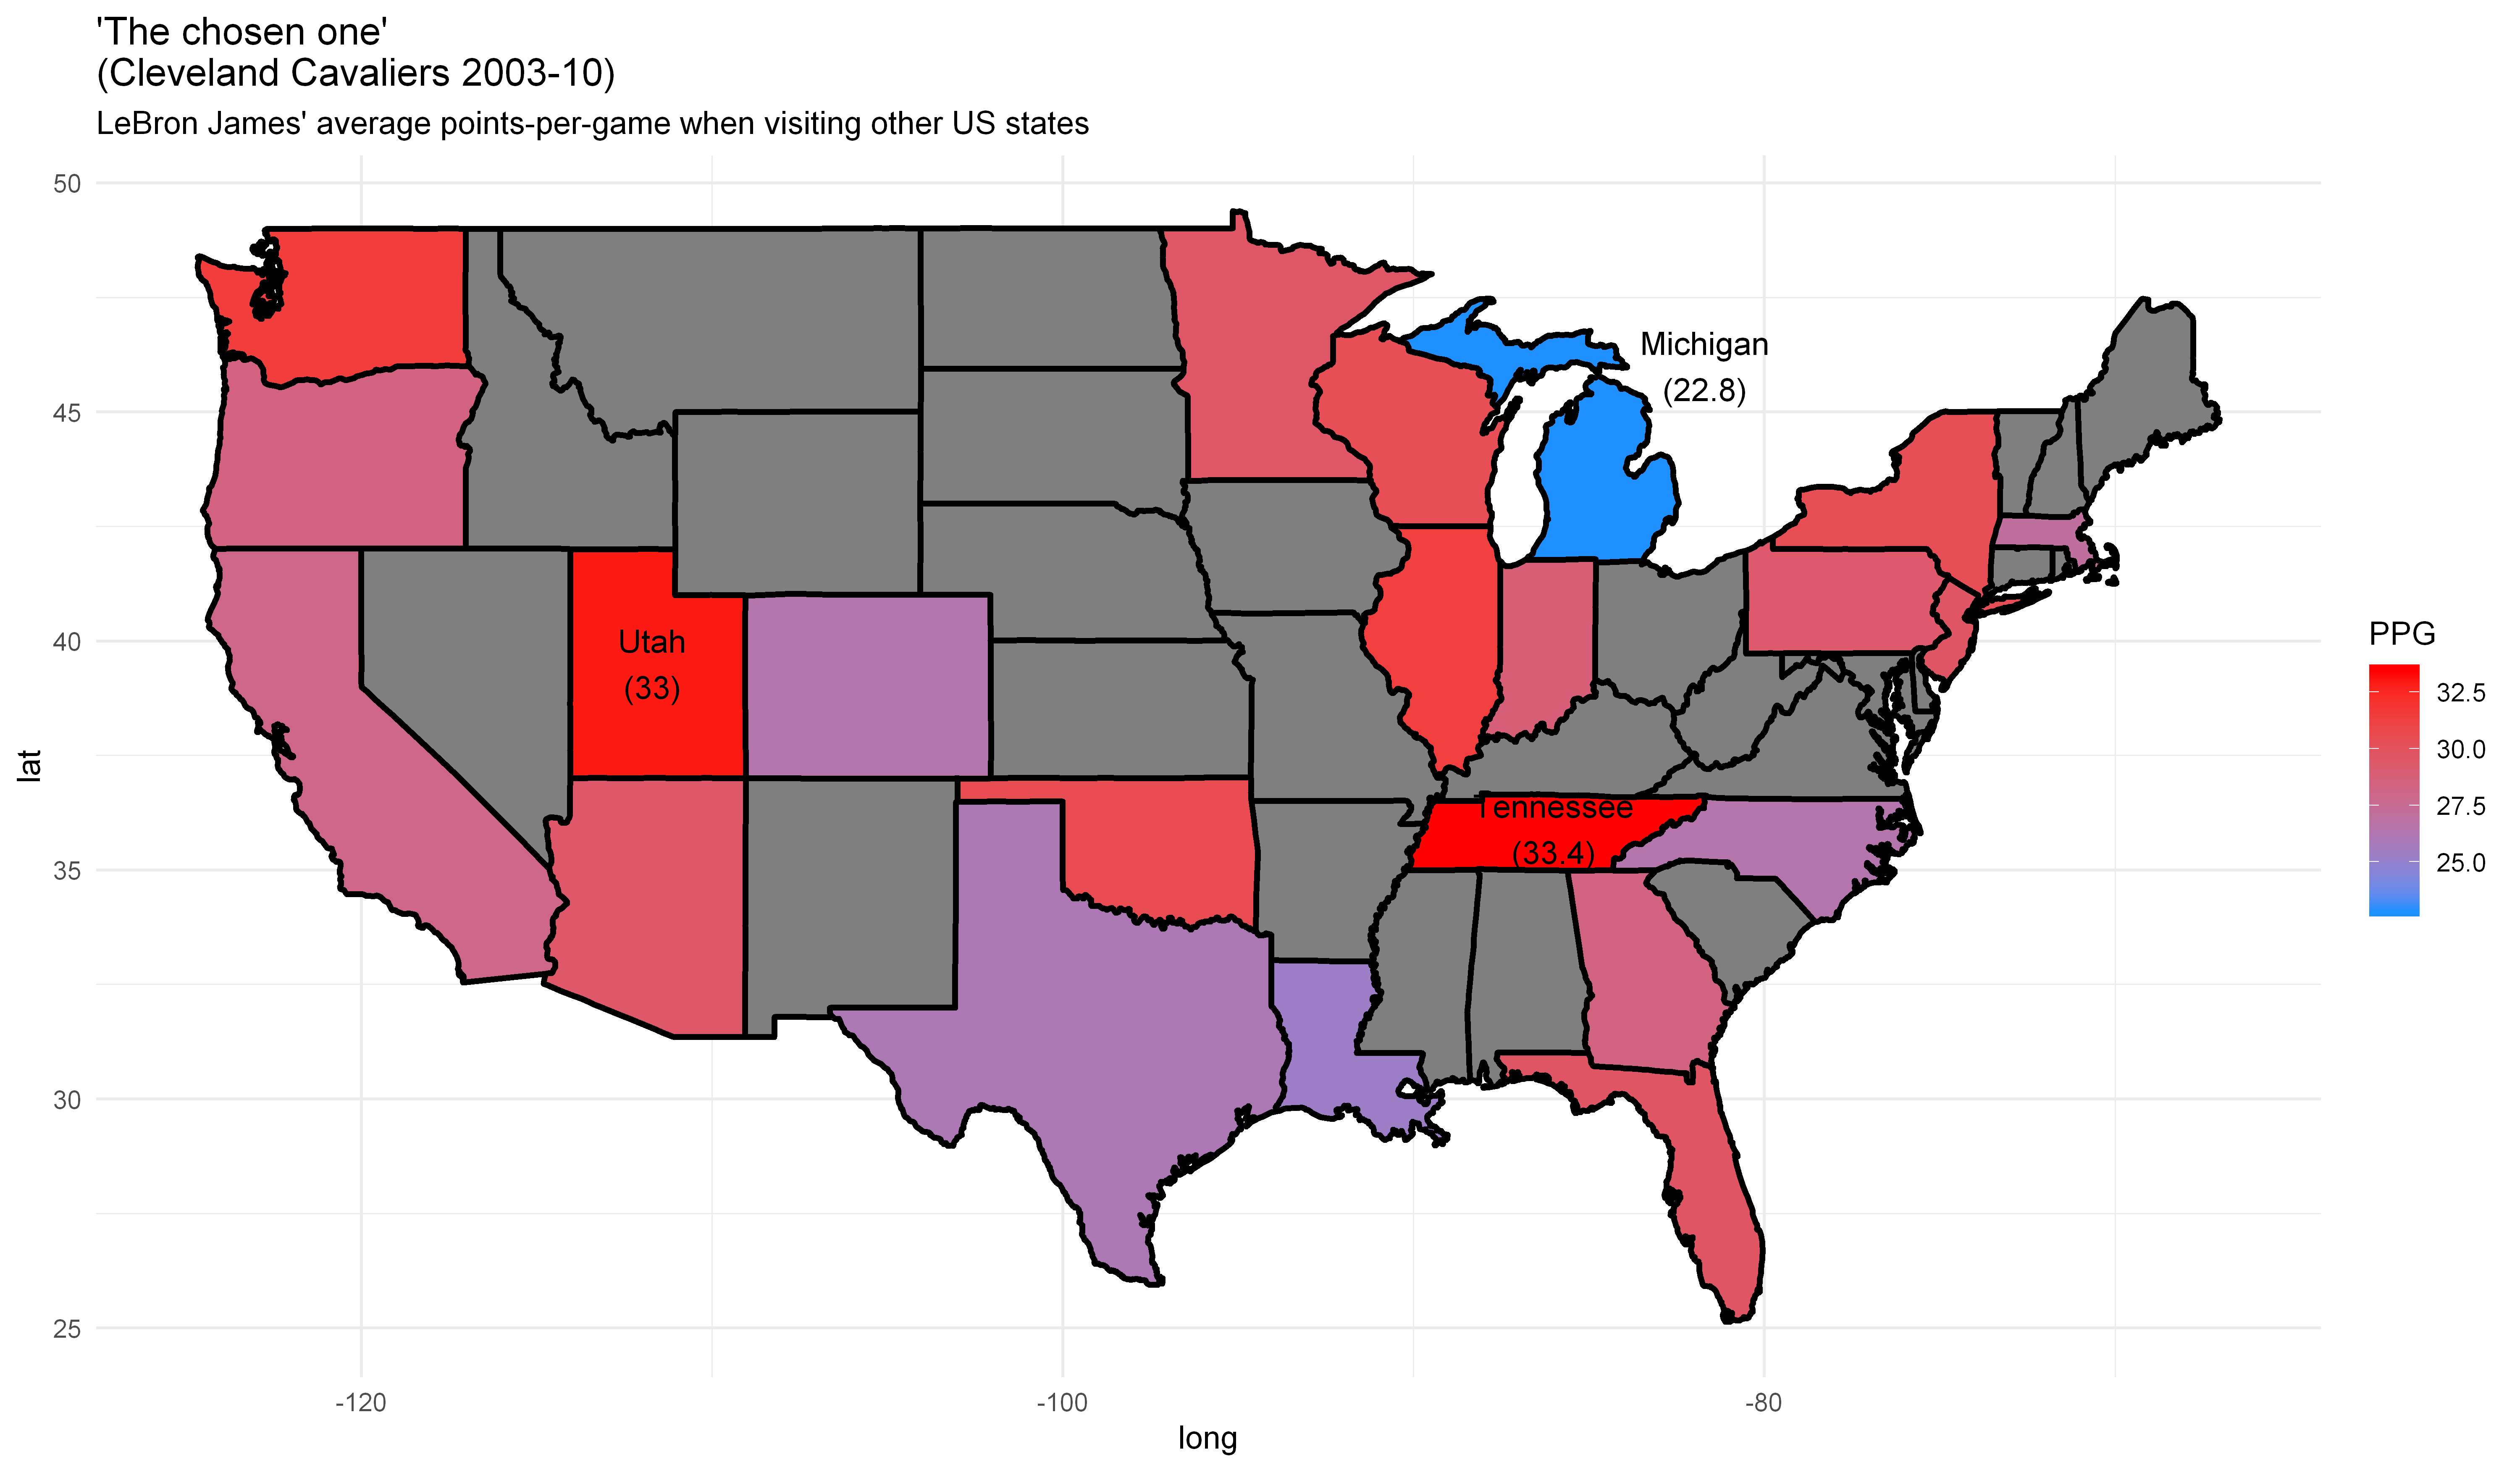

In [16]:
# First era in Cleveland
options(repr.plot.width = 12, repr.plot.height = 7, repr.plot.res = 500) #Change visualization specs
visitor_stats %>% filter(Season < 2011) %>%group_by(State) %>% summarise("PPG" = mean(PTS)) %>% # sumarise data for the period
    left_join(US_states, .) %>% #join with the map of states
    ggplot(aes(x=long, y=lat, group=group))+
      geom_polygon(aes(fill=PPG), color="black", size=1)+
      labs(title="\'The chosen one\'\n(Cleveland Cavaliers 2003-10)", subtitle = "LeBron James' average points-per-game when visiting other US states")+
      scale_fill_gradient(low="dodgerblue", high = "red")+
      annotate(geom="text", x=-81.7, y=46, label="Michigan\n(22.8)")+
      annotate(geom="text", x=-86, y=35.9, label="Tennessee\n(33.4)")+
      annotate(geom="text", x=-111.7, y=39.5, label="Utah\n(33)")+
      theme_minimal()

In [18]:
visitor_stats %>% filter(Season > 2010 & Season < 2015) %>%group_by(State) %>% summarise("PPG" = mean(PTS)) 

State,PPG
<chr>,<dbl>
arizona,31.33333
california,27.40000
colorado,29.33333
district of columbia,27.20000
florida,26.00000
georgia,28.85714
illinois,27.14286
indiana,25.57143
louisiana,27.00000


Joining, by = "State"



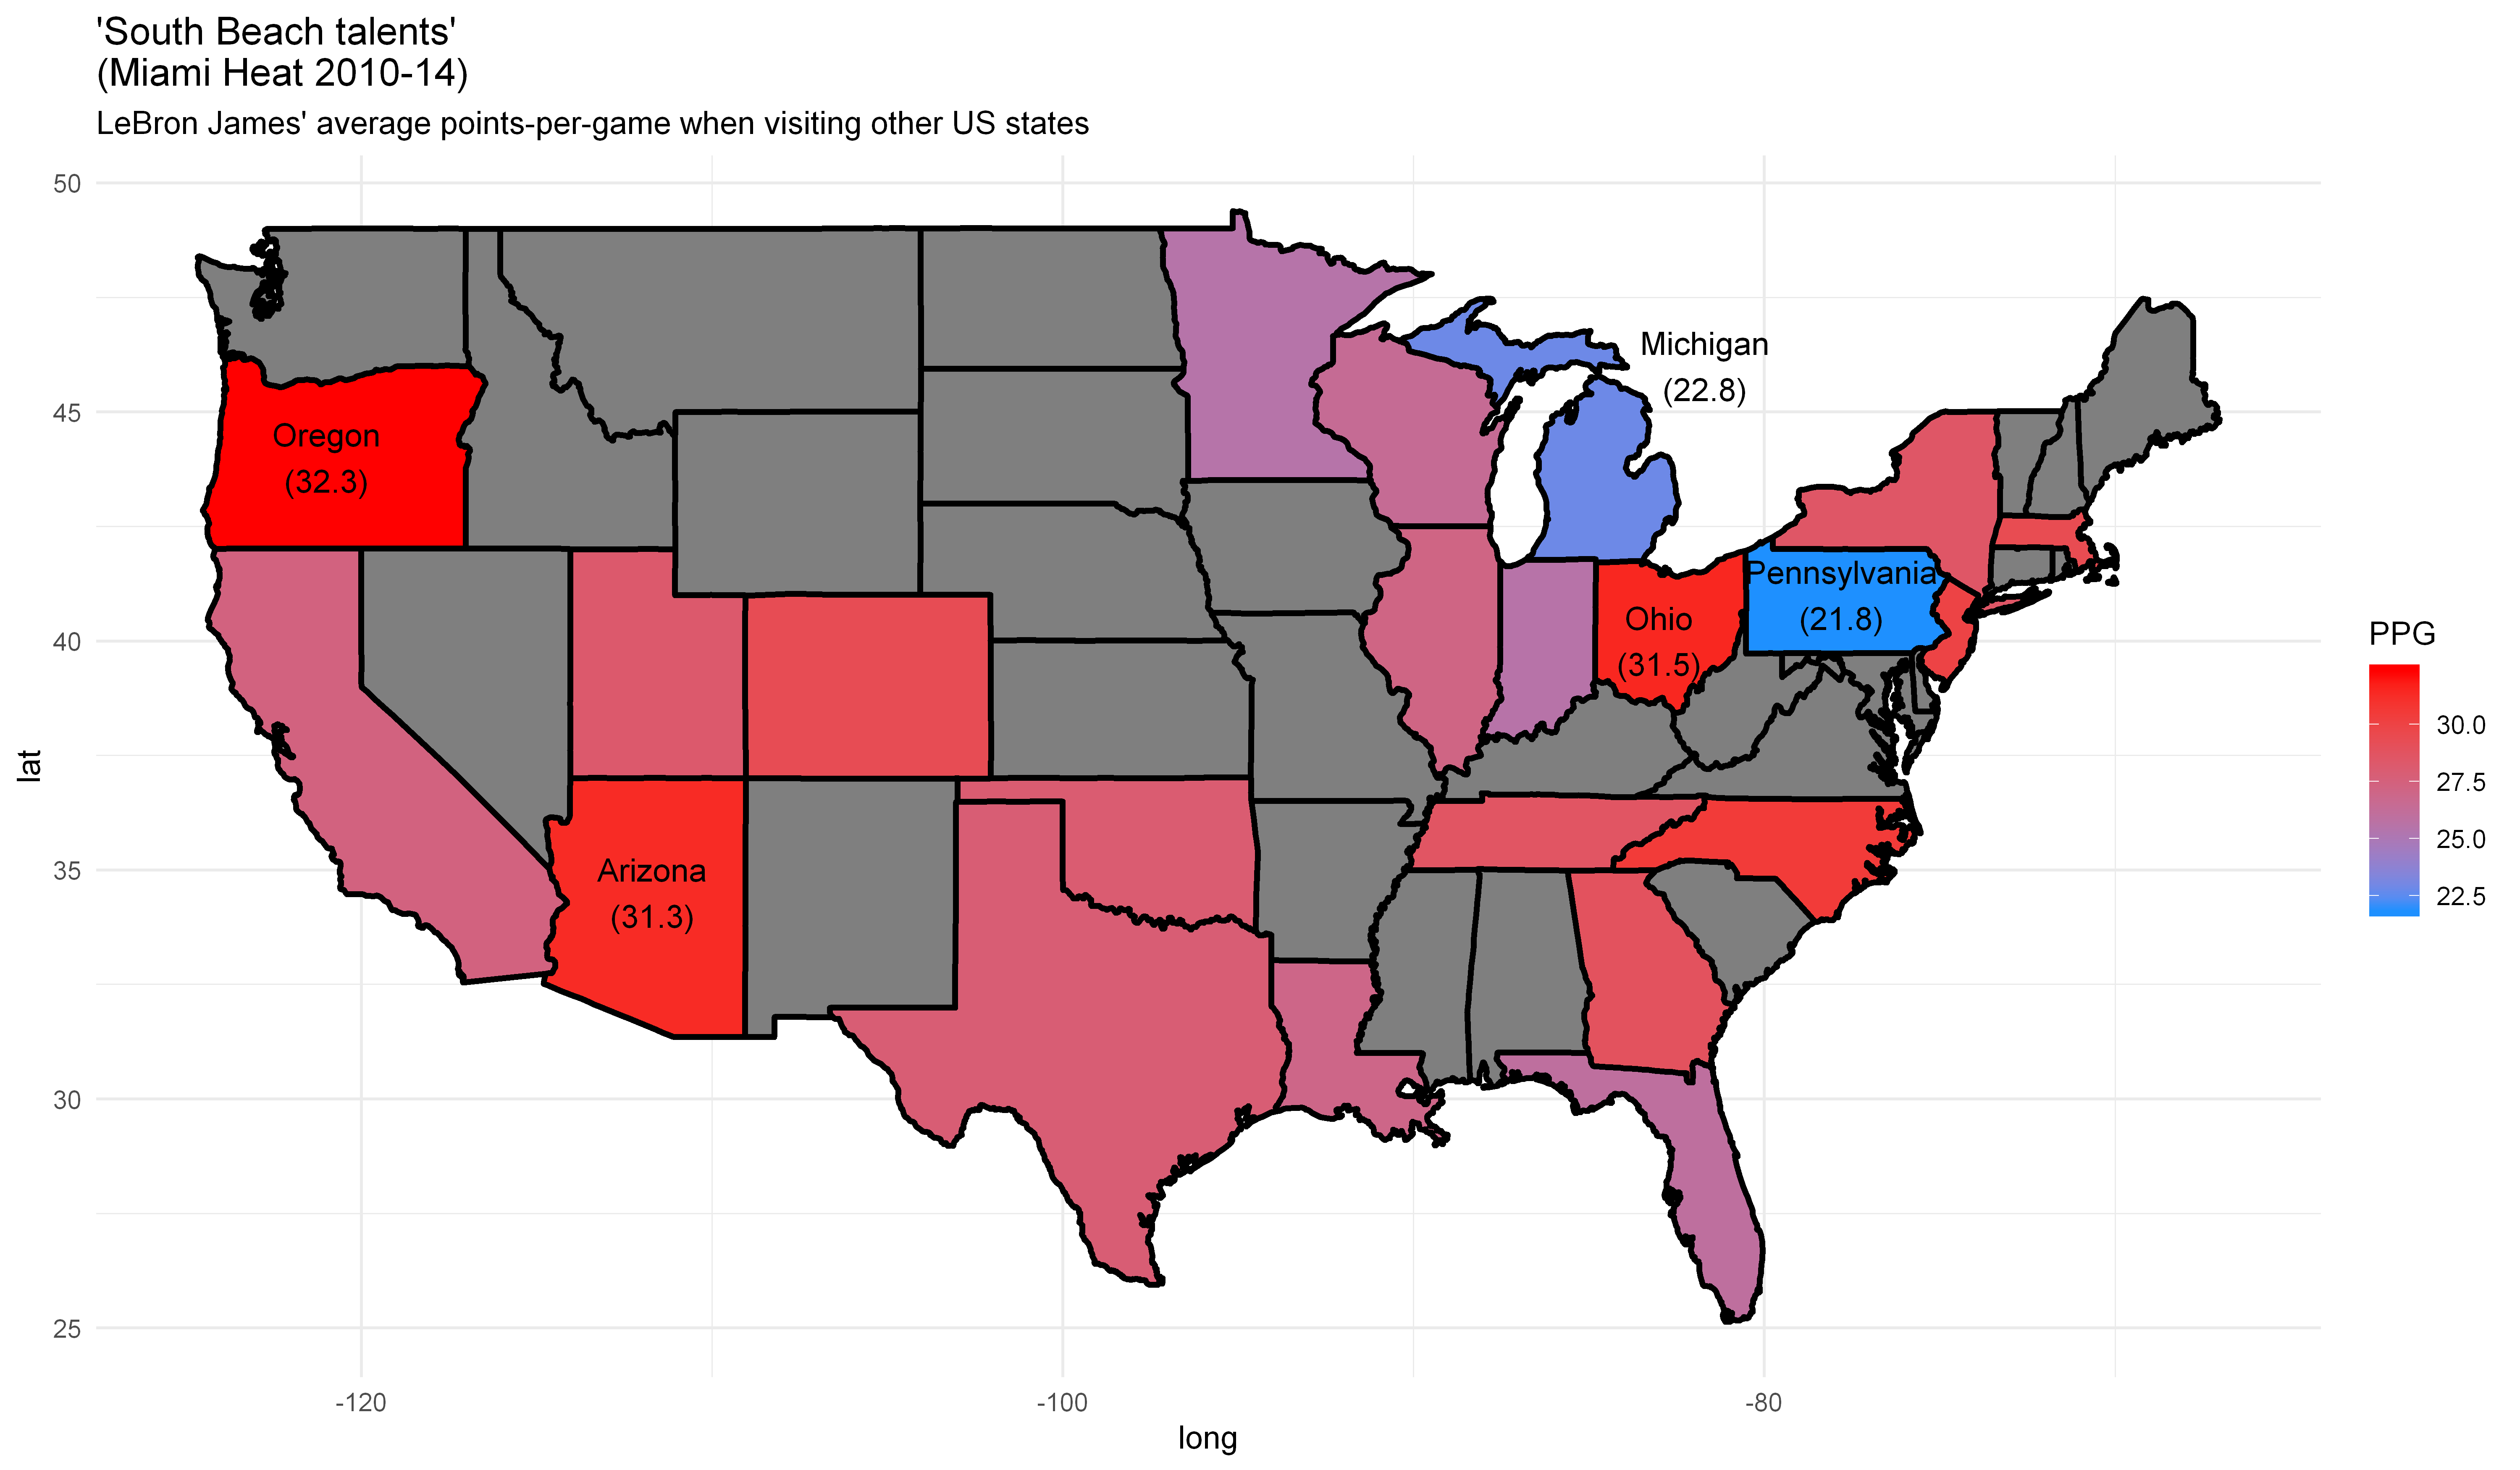

In [22]:
visitor_stats %>% filter(Season > 2010 & Season < 2015) %>%group_by(State) %>% summarise("PPG" = mean(PTS)) %>% # sumarise data for the period
    left_join(US_states, .) %>% #join with the map of states
    ggplot(aes(x=long, y=lat, group=group))+
      geom_polygon(aes(fill=PPG), color="black", size=1)+
      labs(title="\'South Beach talents\'\n(Miami Heat 2010-14)", subtitle = "LeBron James' average points-per-game when visiting other US states")+
      scale_fill_gradient(low="dodgerblue", high = "red")+
      annotate(geom="text", x=-81.7, y=46, label="Michigan\n(22.8)")+
      annotate(geom="text", x=-77.8, y=41, label="Pennsylvania\n(21.8)")+
      annotate(geom="text", x=-83, y=40, label="Ohio\n(31.5)")+
      annotate(geom="text", x=-121, y=44, label="Oregon\n(32.3)")+
      annotate(geom="text", x=-111.7, y=34.5, label="Arizona\n(31.3)")+
      theme_minimal()

Joining, by = "State"



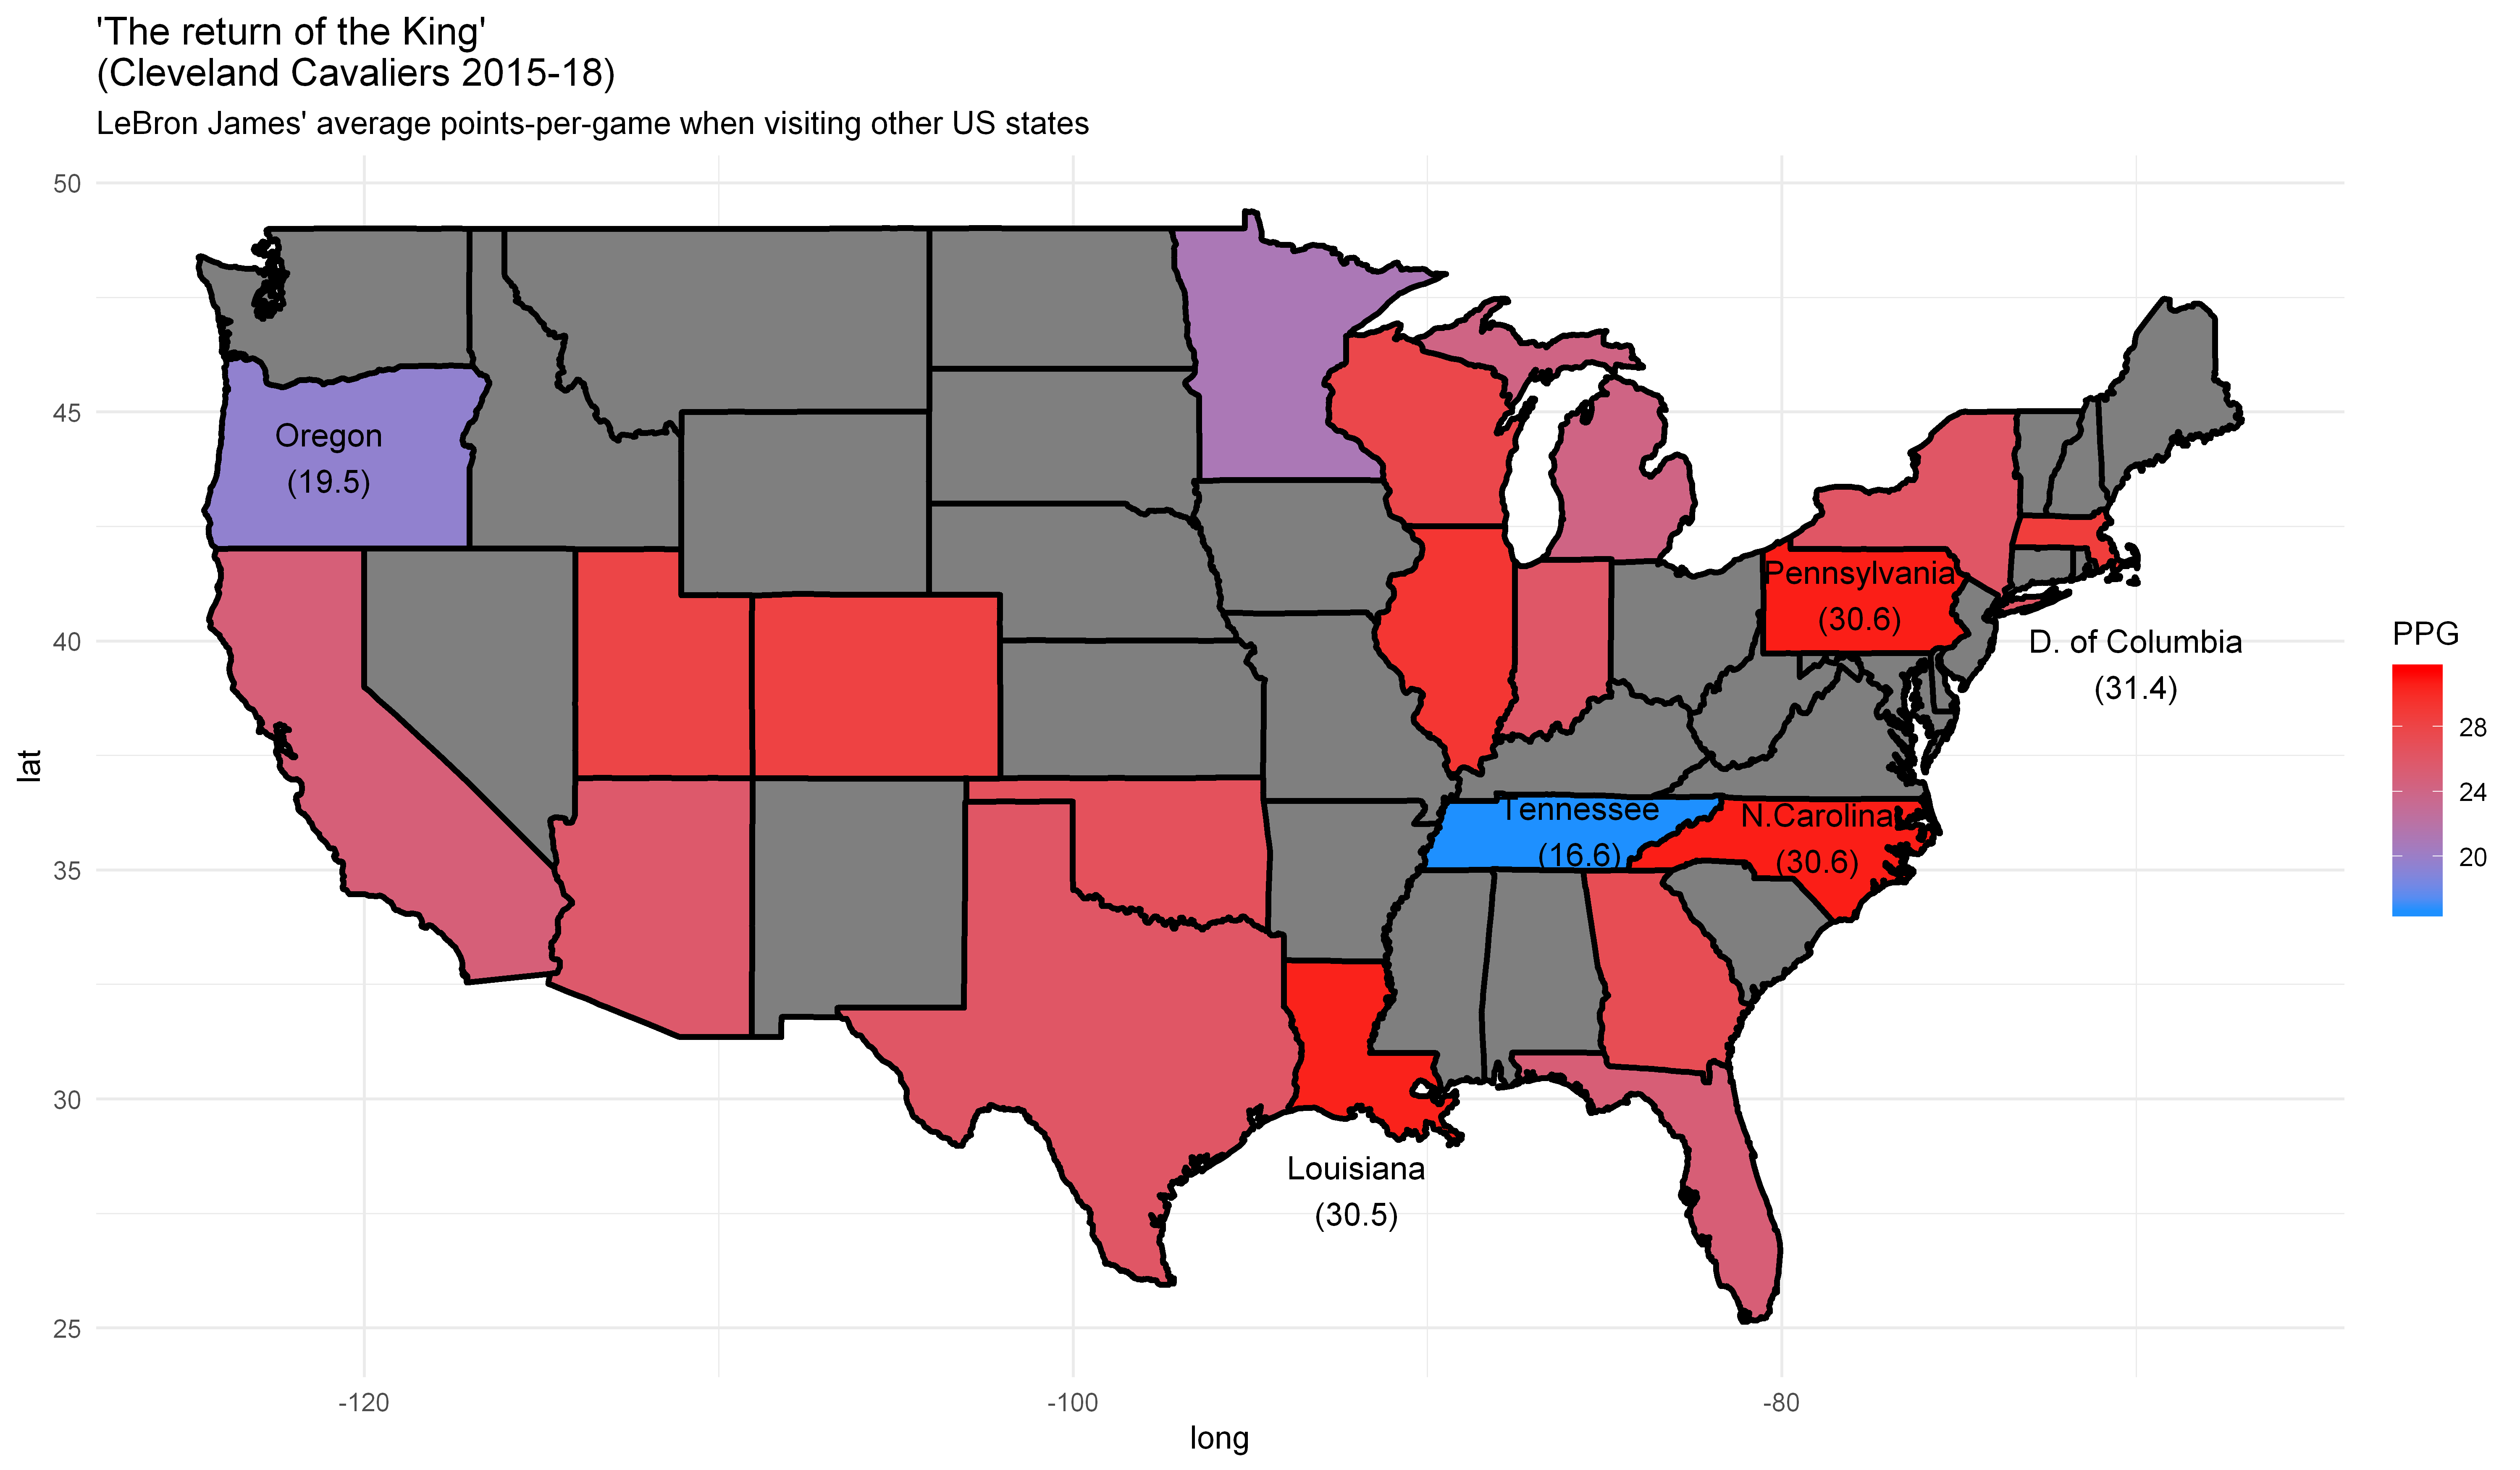

In [33]:
visitor_stats %>% filter(Season > 2014 & Season < 2019) %>%group_by(State) %>% summarise("PPG" = mean(PTS)) %>% # sumarise data for the period
    left_join(US_states, .) %>% #join with the map of states
    ggplot(aes(x=long, y=lat, group=group))+
      geom_polygon(aes(fill=PPG), color="black", size=1)+
      labs(title="\'The return of the King\'\n(Cleveland Cavaliers 2015-18)", subtitle = "LeBron James' average points-per-game when visiting other US states")+
      scale_fill_gradient(low="dodgerblue", high = "red")+
      annotate(geom="text", x=-85.7, y=35.85, label="Tennessee\n(16.6)")+
      annotate(geom="text", x=-121, y=44, label="Oregon\n(19.5)")+
      annotate(geom="text", x=-77.8, y=41, label="Pennsylvania\n(30.6)")+
      annotate(geom="text", x=-92, y=28, label="Louisiana\n(30.5)")+
      annotate(geom="text", x=-79, y=35.7, label="N.Carolina\n(30.6)")+
      annotate(geom="text", x=-70, y=39.5, label="D. of Columbia\n(31.4)")+
      theme_minimal()

Joining, by = "State"



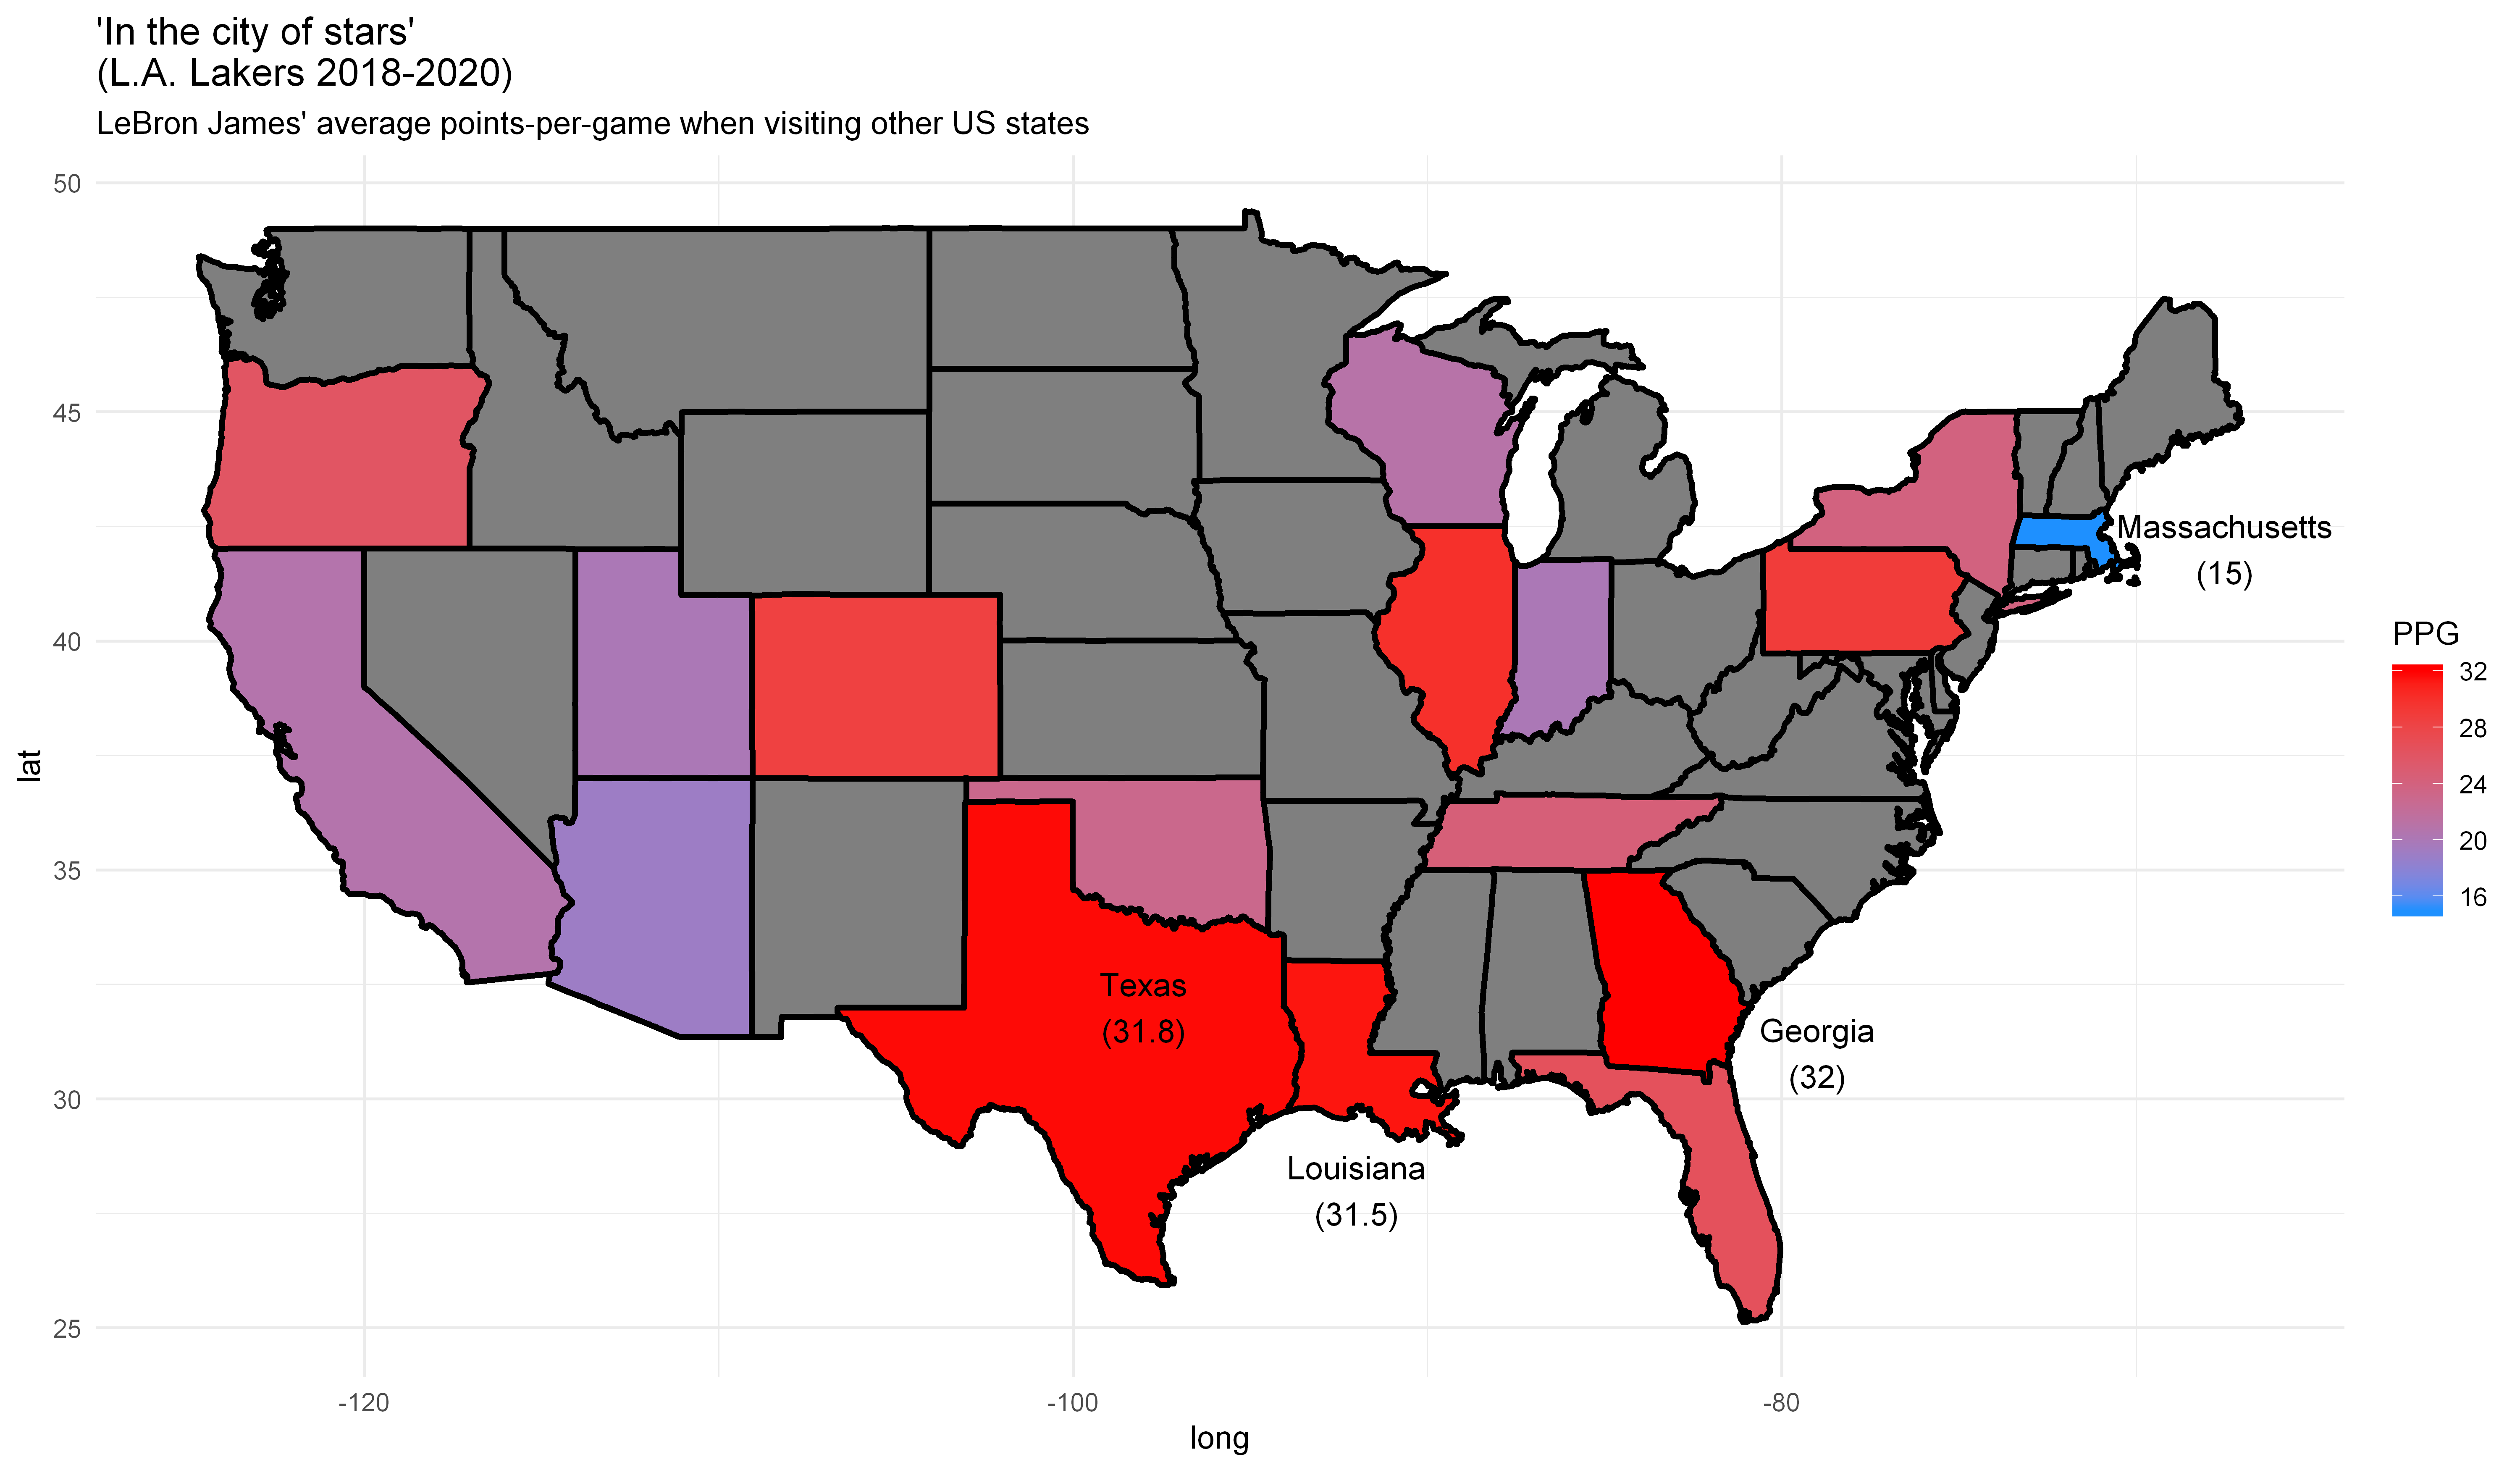

In [45]:
visitor_stats %>% filter(Season > 2019) %>%group_by(State) %>% summarise("PPG" = mean(PTS)) %>%# sumarise data for the period
    left_join(US_states, .) %>% #join with the map of states
    ggplot(aes(x=long, y=lat, group=group))+
      geom_polygon(aes(fill=PPG), color="black", size=1)+
      labs(title="\'In the city of stars\'\n(L.A. Lakers 2018-2020)", subtitle = "LeBron James' average points-per-game when visiting other US states")+
      scale_fill_gradient(low="dodgerblue", high = "red")+
      annotate(geom="text", x=-92, y=28, label="Louisiana\n(31.5)")+
      annotate(geom="text", x=-98, y=32, label="Texas\n(31.8)")+
      annotate(geom="text", x=-79, y=31, label="Georgia\n(32)")+
      annotate(geom="text", x=-67.5, y=42, label="Massachusetts\n(15)")+
      theme_minimal()